<div align="center">

# **Fichier De Travail Sur Les Données** 



</div>
<br><br>
<br><br>
<br><br>

## **Préambule**

---

Ce fichier présente les différentes étapes de travail ayant permis d'écrire notre article.

Pour des raisons de lisibilité, ce fichier favorise l'économie d'écriture de code et la présentation de résultats.

Ainsi, les fonctions utilisées qui ne font pas partie d'une librairie standard, sont des fonctions sur-mesure taillées pour les besoins de ce travail, elles sont dans le fichier Tools.py.

## **Import de la boite à outils et librairies**

---

In [1]:

# librairies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import Normalizer
from random import seed
import warnings

# Facilité intel pour optimiser le calcul avec le cpu
from sklearnex import patch_sklearn
patch_sklearn()


# Notre boite à outils
%load_ext autoreload
%autoreload 2
from Tools import *

# Ajuster l'affichage d'un dataframe pandas
pd.set_option('display.max_rows', None) # affiche toutes les lignes  
pd.set_option('display.max_colwidth', 15)  # Limite la largeur des colonnes
pd.set_option('display.colheader_justify', 'center')  # Centrer les noms de colonnes
pd.set_option('display.width', 1000)  # Limite la largeur totale de l'affichage
pd.set_option('display.max_columns', None)  # Affiche toutes les colonnes sans limite

# Fixer une graine pour la reproductibilité 
seed(0)

# Ignorer des warnings de basse importance
warnings.filterwarnings("ignore")

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


## **1. Exploration et Familiarisation avec les données**

---

Nous allons commencer par charger nos datasets et les convertir en dataframes. Chaque dataframe sera vu à la loupe pour :
- identifier la taille du dataset.
- identifier les colonnes numériques et colonnes catégorielles.
- détecter les valeurs manquantes.
- détecter les valeurs dupliquées.
- détecter les colonnes non porteuses d'information (constantes).
- détecter les colonnes redondantes (deux colonnes de la même mesure par exemple), un seuil de corrélation 0.999 est retenu comme seuil de qualification.
- détecter les outliers, avec la méthode de l'intervalle interquartile.
- évaluer les proportions de chaque classe si classification

In [2]:
files_list = [
    'abalone8', 'abalone17', 'abalone20', 'autompg', 'australian', 'balance', 
    'bankmarketing', 'bupa', 'german', 'glass', 'hayes', 'heart', 'iono', 
    'libras', 'newthyroid', 'pageblocks', 'pima', 'satimage', 'segmentation', 
    'sonar', 'spambase', 'splice', 'vehicle', 'wdbc', 'wine', 'wine4', 
    'yeast3', 'yeast6'
]

# Charger les datasets et les convertir en dataframes
dataframes = datasets_to_dataframes(files_list)
# Mener l'analyse avec une fonction dédiée
summary_df = analyze_datasets(dataframes, files_list)
# Voir les résultats récapitulatifs sous forme d'un tableau
display(summary_df)

,dataset_name,dataset_shape,num_numeric_cols,num_cat_cols,missing_indices,duplicated_indices,low_variance_cols,high_corr_pairs,outlier_indices,class_ratios
0,abalone8,"(4177, 10)",10,0,[],[],[],[],"[5, 35, 37,...",{0: 0.86401...
1,abalone17,"(4177, 10)",10,0,[],[],[],[],"[43, 44, 81...",{0: 0.98611...
2,abalone20,"(4177, 10)",10,0,[],[],[],[],"[6, 43, 44,...",{0: 0.99377...
3,autompg,"(392, 8)",8,0,[],[],[],[],"[6, 7, 8, 9...","{0: 0.625, ..."
4,australian,"(690, 15)",15,0,[],[],[],[],"[0, 2, 3, 4...",{0: 0.55507...
5,balance,"(625, 5)",5,0,[],[],[],[],[],"{0: 0.5392,..."
6,bankmarketing,"(45211, 43)",43,0,[],[],[],[],"[0, 1, 2, 3...",{0: 0.88301...
7,bupa,"(345, 7)",7,0,[],"[76, 154, 2...",[],[],"[1, 17, 29,...",{0: 0.57971...
8,german,"(1000, 25)",25,0,[],[],[],[],"[0, 1, 2, 3...","{0: 0.7, 1:..."
9,glass,"(214, 10)",10,0,[],[39],[],[],"[5, 21, 32,...",{0: 0.67289...


##### **Analyse des résultats de l'exploration des datasets**

Cette analyse nous oriente sur les traitements à réaliser avant d'exploiter nos datasets.

##### **Caractéristiques générales**

L'ensemble comprend 28 datasets différents, allant de petites tailles (132 échantillons pour Hayes) à de grandes tailles (45 211 échantillons pour Bankmarketing).
  
La conversion des colonnes catégorielles s'est bien passée pour tous les datasets. (Notons la modif au code base pour un drop_first=True)

  
Le nombre de caractéristiques varie considérablement, de 5 (Balance, Hayes) à 91 (Libras).

##### **Problèmes de qualité des données**

- Valeurs manquantes et doublons

  Aucun dataset ne présente de valeurs manquantes.
  
  Plusieurs datasets contiennent des doublons, notamment Hayes, Libras, Pageblocks et Spambase.

- Colonnes à faible variance (quasi-nulle, contstante)

  Seuls deux datasets (Iono et Segmentation) ont des colonnes constantes identifiées.

- Paires de colonnes hautement corrélées

  Le dataset Libras présente de nombreuses paires de caractéristiques hautement corrélées.

- Valeurs aberrantes

  La plupart des datasets contiennent des valeurs aberrantes, à l'exception de Balance et Splice.

- Déséquilibre des classes

  Plusieurs datasets présentent un déséquilibre significatif entre les classes :
  
  Abalone17 et Abalone20 ont des ratios de classe très déséquilibrés (98,6% et 99,4% pour la classe majoritaire).
  
  Wine4 et Yeast6 ont également des ratios très déséquilibrés (96,7% et 97,6% pour la classe majoritaire).
  
  D'autres datasets comme Balance, Heart et Sonar ont des distributions de classes plus équilibrées.

##### **Implications et choix de traitements**

- les doublons seront supprimés, car il reste à chaque dataset suffisamment de données sans.
  
- Les colonnes constantes seront supprimées, car elles n'apportent pas d'information.
  
- Les colonnes redondantes seront également supprimées, en particulier pour éviter des problèmes potentiels de colinéarité.
  
- Les valeurs aberrantes sont trop nombreuses, et aux origines non identifiées. Il serait risqué de les supprimer sans plus d'informations sur leur origine.
  
- Variabilité des échelles : Plusieurs datasets contiennent des variables avec des échelles très différentes (comme pageblocks ou sonar). Une normalisation ou standardisation peut être nécessaire pour améliorer les performances des modèles.
  
- Déséquilibre des classes : Des techniques de rééchantillonnage ou de pondération des classes seront potentiellement nécessaires pour les datasets très déséquilibrés.


##### **Appliquons nos choix de prétraitement** :

In [3]:
# Prétraitements des dataframes bruts
processed_dataframes = process_dataframes(dataframes, summary_df, drop_na=True, drop_duplicates=True, drop_low_variance=True, drop_redundant=True, drop_outliers=False)

# Re-analyse après les prétraitements
summary_processed= analyze_datasets(processed_dataframes, files_list)

# Affichage du résultat
display(summary_processed)

,dataset_name,dataset_shape,num_numeric_cols,num_cat_cols,missing_indices,duplicated_indices,low_variance_cols,high_corr_pairs,outlier_indices,class_ratios
0,abalone8,"(4177, 10)",10,0,[],[],[],[],"[5, 35, 37,...",{0: 0.86401...
1,abalone17,"(4177, 10)",10,0,[],[],[],[],"[43, 44, 81...",{0: 0.98611...
2,abalone20,"(4177, 10)",10,0,[],[],[],[],"[6, 43, 44,...",{0: 0.99377...
3,autompg,"(392, 8)",8,0,[],[],[],[],"[6, 7, 8, 9...","{0: 0.625, ..."
4,australian,"(690, 15)",15,0,[],[],[],[],"[0, 2, 3, 4...",{0: 0.55507...
5,balance,"(625, 5)",5,0,[],[],[],[],[],"{0: 0.5392,..."
6,bankmarketing,"(45211, 43)",43,0,[],[],[],[],"[0, 1, 2, 3...",{0: 0.88301...
7,bupa,"(341, 7)",7,0,[],[],[],[],"[1, 17, 29,...",{0: 0.58357...
8,german,"(1000, 25)",25,0,[],[],[],[],"[0, 1, 2, 3...","{0: 0.7, 1:..."
9,glass,"(213, 10)",10,0,[],[],[],[],"[5, 21, 32,...",{0: 0.67605...


## **2. Sub-division sur critère de l'équilibre des classes dans les labels**

---

Nous avons à ce stade 28 Datasets avec un équilibre des labels allant de "équilibré" à "très sévèrement déséquilibrés".

Le choix est de partager nos datasets en deux groupes :

- Ceux dont la classe majoritaire ne dépasse pas les 60%

- Ceux dont la classe majoritaire dépasse les 60%

Cette division servira de simple repère, pour avoir une idée globale du déroulé des expérimentations et faire des contrôles intermédiaires lors des premiers résultats.

En effet, dans ce travail, toutes les expériences seront menées sur tous les datasets, et tous les résultats seront gardés pour une analyse finale. Cet façon de procéder me paraissait plus complète et informative.

Notons que pour nos jeux de données, la classe majoritaire est toujours la classe négative y == 0

Notons également que les datasets ont été classés par **ordre croissant de déséquilibre**. Cet ordre nous facilitera la détection de patterns ou de relations entre les résultats, les algorithmes et l'intensité du déséquilibre

In [4]:
# Diviser en deux groupes avec un seuil de 0.6 pour la classe majoritaire
group1, group2 = split_dataframes_by_class_ratio(processed_dataframes, summary_processed, threshold=0.6)
# Appel de la fonction avec group1 et group2
results_df = create_ratio_table(group1, group2)
# Affichage du tableau
print(results_df)

        Nom        Groupe   Ratio classe 1
0           sonar  Group 1     0.466346   
1         balance  Group 1     0.460800   
2          splice  Group 1     0.449348   
3      australian  Group 1     0.444928   
4           heart  Group 1     0.444444   
5           hayes  Group 1     0.434783   
6            bupa  Group 1     0.416422   
7        spambase  Group 2     0.398954   
8         autompg  Group 2     0.375000   
9            wdbc  Group 2     0.372583   
10           iono  Group 2     0.357143   
11           pima  Group 2     0.348958   
12           wine  Group 2     0.331461   
13          glass  Group 2     0.323944   
14     newthyroid  Group 2     0.302326   
15         german  Group 2     0.300000   
16        vehicle  Group 2     0.235225   
17   segmentation  Group 2     0.142857   
18       abalone8  Group 2     0.135983   
19  bankmarketing  Group 2     0.116985   
20         yeast3  Group 2     0.111493   
21       satimage  Group 2     0.097280   
22     page

## **3. Split en Train-Test**

---

Nous devons à ce stade réserver une partie test de chaque dataset, qui ne servira qu'à l'évaluation finale de la capacité de généralisation des différents modèles. Une proportion de 20% du nombre d'observations de chaque dataset est un bon compromis dans ce type de travail ou il y aura des techniques de cross validation sur les 80% restants.

Afin de garantir la reproductiblité des splits, le seed est fixée à 0.


In [5]:
# Faire le split en train test, reunir le tout dans un grand dictionnaire

train_test_data = split_groups_train_test(group1, group2, test_size=0.2, random_state=0)

## **4. Modélisation**

---

Dans cette partie, nous allons commencer à ajusetr nos modèles.

il y aura deux familles de méthodes : simples et ensemblistes.

Ces méthodes seront appliqués de façon brute, ou en rééquilibrant.

Le rééquilibrage sera fait sur les datasets ou en jouant sur les poids attribués aux erreurs de chaque classe.

Certains hyper-paramètres seront Fine-tunés par cross validation.

Pour des raisons de lisibilité, chaque famille d'algorithmes sera traitée séparément, afin de garder une idée claire sur le travail fait.

### **4.1 Modèles classiques sans méthodes ensemblistes et sans rééquilibrage**

#### **4.1.1 Régression logistique pénalisée "Ridge"**

In [6]:
from sklearn.linear_model import LogisticRegression

# Le paramètre qui sera ajusté ici (par cross validation) est le paramètre de pénalité ridge 
param_name = 'C'
param_values = [0.001, 0.01, 0.1, 1, 10]
classifier = LogisticRegression(max_iter=100, penalty="l2",solver = "liblinear", class_weight=None, random_state=0, n_jobs=-1)

# Appel de la fonction
basic_results_Logreg_l2, basic_models_logreg_l2 = basic_fintune_and_evaluate_CV(train_test_data, classifier, param_name, param_values)

# Afficher les résultats
display(basic_results_Logreg_l2)

,group_name,dataset_name,train_size,test_size,test_positives,best_param,accuracy,precision,recall,f1_score,auc_roc,auc_pr,training_time,memory_used,group_mean_train_size,group_mean_test_size,group_mean_test_positives,group_mean_best_param,group_mean_accuracy,group_mean_precision,group_mean_recall,group_mean_f1_score,group_mean_auc_roc,group_mean_auc_pr,group_mean_training_time,group_mean_memory_used
0,group1,sonar,166,42,20,1.000,0.761905,0.812500,0.650000,0.722222,0.840909,0.858751,6.378779,0.609375,593.285714,148.714286,66.714286,2.001571,0.809261,0.821342,0.744891,0.774950,0.871582,0.864344,1.185048,0.105469
1,group1,balance,500,125,58,0.010,0.960000,0.981818,0.931034,0.955752,0.986876,0.985893,0.281165,0.000000,593.285714,148.714286,66.714286,2.001571,0.809261,0.821342,0.744891,0.774950,0.871582,0.864344,1.185048,0.105469
2,group1,splice,2392,599,269,1.000,0.853088,0.846743,0.821561,0.833962,0.932826,0.911560,0.498093,0.121094,593.285714,148.714286,66.714286,2.001571,0.809261,0.821342,0.744891,0.774950,0.871582,0.864344,1.185048,0.105469
3,group1,australian,552,138,61,10.000,0.862319,0.850000,0.836066,0.842975,0.930594,0.940991,0.291153,0.000000,593.285714,148.714286,66.714286,2.001571,0.809261,0.821342,0.744891,0.774950,0.871582,0.864344,1.185048,0.105469
4,group1,heart,216,54,24,0.001,0.703704,0.633333,0.791667,0.703704,0.859722,0.871828,0.285026,0.003906,593.285714,148.714286,66.714286,2.001571,0.809261,0.821342,0.744891,0.774950,0.871582,0.864344,1.185048,0.105469
5,group1,hayes,55,14,6,1.000,0.857143,1.000000,0.666667,0.800000,0.895833,0.896825,0.288534,0.000000,593.285714,148.714286,66.714286,2.001571,0.809261,0.821342,0.744891,0.774950,0.871582,0.864344,1.185048,0.105469
6,group1,bupa,272,69,29,1.000,0.666667,0.625000,0.517241,0.566038,0.654310,0.584561,0.272586,0.003906,593.285714,148.714286,66.714286,2.001571,0.809261,0.821342,0.744891,0.774950,0.871582,0.864344,1.185048,0.105469
7,group2,spambase,3364,842,336,0.001,0.893112,0.853448,0.883929,0.868421,0.948958,0.906952,0.526715,0.984375,3237.619048,809.904762,102.761905,5.381714,0.901032,0.648137,0.518300,0.537649,0.862119,0.629302,0.393795,0.226376
8,group2,autompg,313,79,30,10.000,0.873418,0.812500,0.866667,0.838710,0.929252,0.854398,0.288638,0.003906,3237.619048,809.904762,102.761905,5.381714,0.901032,0.648137,0.518300,0.537649,0.862119,0.629302,0.393795,0.226376
9,group2,wdbc,455,114,42,0.001,0.850877,0.727273,0.952381,0.824742,0.982804,0.978458,0.304764,0.011719,3237.619048,809.904762,102.761905,5.381714,0.901032,0.648137,0.518300,0.537649,0.862119,0.629302,0.393795,0.226376


#### **4.1.2 SVM Linéaire avec pénalité "Ridge"**

In [7]:
from sklearn.svm import LinearSVC

# Paramètre de pénalité à ajuster par cross validation
param_name = 'C'
param_values = [0.001, 0.01, 0.1, 1, 10]
classifier = LinearSVC(max_iter=100, penalty="l2", class_weight=None, random_state=0)

# Ajustement et résultats sur test
basic_results_svm_l2, basic_models_svm_l2 = basic_fintune_and_evaluate_CV(train_test_data, classifier, param_name, param_values)

# Afficher les résultats
display(basic_results_svm_l2)


,group_name,dataset_name,train_size,test_size,test_positives,best_param,accuracy,precision,recall,f1_score,auc_roc,auc_pr,training_time,memory_used,group_mean_train_size,group_mean_test_size,group_mean_test_positives,group_mean_best_param,group_mean_accuracy,group_mean_precision,group_mean_recall,group_mean_f1_score,group_mean_auc_roc,group_mean_auc_pr,group_mean_training_time,group_mean_memory_used
0,group1,sonar,166,42,20,1.000,0.738095,0.846154,0.550000,0.666667,0.806818,0.836927,0.321395,0.011719,593.285714,148.714286,66.714286,3.043000,0.799559,0.816319,0.734540,0.765611,0.86060,0.852454,0.360432,0.004464
1,group1,balance,500,125,58,10.000,0.960000,0.981818,0.931034,0.955752,0.990221,0.990253,0.282626,0.000000,593.285714,148.714286,66.714286,3.043000,0.799559,0.816319,0.734540,0.765611,0.86060,0.852454,0.360432,0.004464
2,group1,splice,2392,599,269,0.100,0.858097,0.848485,0.832714,0.840525,0.933401,0.912402,0.788962,0.015625,593.285714,148.714286,66.714286,3.043000,0.799559,0.816319,0.734540,0.765611,0.86060,0.852454,0.360432,0.004464
3,group1,australian,552,138,61,0.100,0.869565,0.852459,0.852459,0.852459,0.927188,0.937956,0.297013,0.000000,593.285714,148.714286,66.714286,3.043000,0.799559,0.816319,0.734540,0.765611,0.86060,0.852454,0.360432,0.004464
4,group1,heart,216,54,24,0.001,0.777778,0.730769,0.791667,0.760000,0.856944,0.869124,0.284836,0.000000,593.285714,148.714286,66.714286,3.043000,0.799559,0.816319,0.734540,0.765611,0.86060,0.852454,0.360432,0.004464
5,group1,hayes,55,14,6,0.100,0.857143,1.000000,0.666667,0.800000,0.895833,0.896825,0.275477,0.000000,593.285714,148.714286,66.714286,3.043000,0.799559,0.816319,0.734540,0.765611,0.86060,0.852454,0.360432,0.004464
6,group1,bupa,272,69,29,10.000,0.536232,0.454545,0.517241,0.483871,0.613793,0.523693,0.272717,0.003906,593.285714,148.714286,66.714286,3.043000,0.799559,0.816319,0.734540,0.765611,0.86060,0.852454,0.360432,0.004464
7,group2,spambase,3364,842,336,0.100,0.920428,0.892128,0.910714,0.901325,0.964774,0.923332,0.498030,0.027344,3237.619048,809.904762,102.761905,3.162143,0.902711,0.633040,0.511478,0.527078,0.85445,0.615554,0.482119,0.055246
8,group2,autompg,313,79,30,1.000,0.898734,0.823529,0.933333,0.875000,0.931973,0.859810,0.286494,0.000000,3237.619048,809.904762,102.761905,3.162143,0.902711,0.633040,0.511478,0.527078,0.85445,0.615554,0.482119,0.055246
9,group2,wdbc,455,114,42,0.001,0.894737,0.800000,0.952381,0.869565,0.987103,0.983538,0.287774,0.003906,3237.619048,809.904762,102.761905,3.162143,0.902711,0.633040,0.511478,0.527078,0.85445,0.615554,0.482119,0.055246


#### **4.1.3 Decision Tree**

In [8]:
from sklearn.tree import DecisionTreeClassifier



# Ici, on fine-tune le paramètre 'max_depth', qui limite la profondeur de l'arbre
param_name = 'max_depth'
param_values = [3, 5, 10, 20, None]  # None signifie aucune limite de profondeur

# l'arbre de décision à fine-tuner
classifier = DecisionTreeClassifier(random_state=0, class_weight=None)

# Ajustement et résultats
basic_results_tree, basic_models_tree = basic_fintune_and_evaluate_CV(train_test_data, classifier, param_name, param_values)

# Afficher les résultats
display(basic_results_tree)


,group_name,dataset_name,train_size,test_size,test_positives,best_param,accuracy,precision,recall,f1_score,auc_roc,auc_pr,training_time,memory_used,group_mean_train_size,group_mean_test_size,group_mean_test_positives,group_mean_best_param,group_mean_accuracy,group_mean_precision,group_mean_recall,group_mean_f1_score,group_mean_auc_roc,group_mean_auc_pr,group_mean_training_time,group_mean_memory_used
0,group1,sonar,166,42,20,5.0,0.642857,0.619048,0.650000,0.634146,0.595455,0.564286,0.327414,0.183594,593.285714,148.714286,66.714286,8.00,0.807431,0.799375,0.762853,0.779337,0.809084,0.758906,0.348905,0.029576
1,group1,balance,500,125,58,10.0,0.872000,0.888889,0.827586,0.857143,0.869017,0.815632,0.278750,0.003906,593.285714,148.714286,66.714286,8.00,0.807431,0.799375,0.762853,0.779337,0.809084,0.758906,0.348905,0.029576
2,group1,splice,2392,599,269,5.0,0.939900,0.920578,0.947955,0.934066,0.966661,0.938299,0.679783,0.011719,593.285714,148.714286,66.714286,8.00,0.807431,0.799375,0.762853,0.779337,0.809084,0.758906,0.348905,0.029576
3,group1,australian,552,138,61,3.0,0.833333,0.865385,0.737705,0.796460,0.889930,0.865902,0.297564,0.000000,593.285714,148.714286,66.714286,8.00,0.807431,0.799375,0.762853,0.779337,0.809084,0.758906,0.348905,0.029576
4,group1,heart,216,54,24,10.0,0.740741,0.750000,0.625000,0.681818,0.729167,0.635417,0.290190,0.000000,593.285714,148.714286,66.714286,8.00,0.807431,0.799375,0.762853,0.779337,0.809084,0.758906,0.348905,0.029576
5,group1,hayes,55,14,6,3.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.281064,0.007812,593.285714,148.714286,66.714286,8.00,0.807431,0.799375,0.762853,0.779337,0.809084,0.758906,0.348905,0.029576
6,group1,bupa,272,69,29,20.0,0.623188,0.551724,0.551724,0.551724,0.613362,0.492805,0.287573,0.000000,593.285714,148.714286,66.714286,8.00,0.807431,0.799375,0.762853,0.779337,0.809084,0.758906,0.348905,0.029576
7,group2,spambase,3364,842,336,20.0,0.912114,0.861878,0.928571,0.893983,0.921857,0.846968,0.701454,0.058594,3237.619048,809.904762,102.761905,9.55,0.899927,0.629932,0.611313,0.602275,0.811895,0.554907,0.413924,0.007440
8,group2,autompg,313,79,30,10.0,0.936709,0.962963,0.866667,0.912281,0.923129,0.885201,0.270493,0.003906,3237.619048,809.904762,102.761905,9.55,0.899927,0.629932,0.611313,0.602275,0.811895,0.554907,0.413924,0.007440
9,group2,wdbc,455,114,42,3.0,0.947368,0.928571,0.928571,0.928571,0.970569,0.929842,0.328821,0.003906,3237.619048,809.904762,102.761905,9.55,0.899927,0.629932,0.611313,0.602275,0.811895,0.554907,0.413924,0.007440


#### **4.1.4 K-Nearest Neighbors**

In [9]:
from sklearn.neighbors import KNeighborsClassifier

# Nombre de voisins à ajuster
param_name = 'n_neighbors'
param_values = [3, 5, 7, 9, 11]

# Classifieur KNN
classifier = KNeighborsClassifier(p=2, weights="uniform", n_jobs=-1) # distance euclidienne p=2

# Ajustements et résultats
basic_results_knn, basic_models_knn = basic_fintune_and_evaluate_CV(train_test_data, classifier, param_name, param_values)

# Afficher les résultats
display(basic_results_knn)

,group_name,dataset_name,train_size,test_size,test_positives,best_param,accuracy,precision,recall,f1_score,auc_roc,auc_pr,training_time,memory_used,group_mean_train_size,group_mean_test_size,group_mean_test_positives,group_mean_best_param,group_mean_accuracy,group_mean_precision,group_mean_recall,group_mean_f1_score,group_mean_auc_roc,group_mean_auc_pr,group_mean_training_time,group_mean_memory_used
0,group1,sonar,166,42,20,5,0.880952,1.000000,0.750000,0.857143,0.982955,0.967391,0.327390,0.246094,593.285714,148.714286,66.714286,7.857143,0.787871,0.830466,0.693062,0.734889,0.872330,0.821602,0.320185,0.388951
1,group1,balance,500,125,58,9,0.912000,0.912281,0.896552,0.904348,0.967576,0.961767,0.287527,0.273438,593.285714,148.714286,66.714286,7.857143,0.787871,0.830466,0.693062,0.734889,0.872330,0.821602,0.320185,0.388951
2,group1,splice,2392,599,269,11,0.682805,0.594272,0.925651,0.723837,0.821482,0.753647,0.499108,2.199219,593.285714,148.714286,66.714286,7.857143,0.787871,0.830466,0.693062,0.734889,0.872330,0.821602,0.320185,0.388951
3,group1,australian,552,138,61,5,0.753623,0.813953,0.573770,0.673077,0.849265,0.793836,0.288427,0.003906,593.285714,148.714286,66.714286,7.857143,0.787871,0.830466,0.693062,0.734889,0.872330,0.821602,0.320185,0.388951
4,group1,heart,216,54,24,11,0.833333,0.826087,0.791667,0.808511,0.863194,0.821075,0.286713,0.000000,593.285714,148.714286,66.714286,7.857143,0.787871,0.830466,0.693062,0.734889,0.872330,0.821602,0.320185,0.388951
5,group1,hayes,55,14,6,7,0.785714,1.000000,0.500000,0.666667,0.916667,0.863095,0.274370,0.000000,593.285714,148.714286,66.714286,7.857143,0.787871,0.830466,0.693062,0.734889,0.872330,0.821602,0.320185,0.388951
6,group1,bupa,272,69,29,7,0.666667,0.666667,0.413793,0.510638,0.705172,0.590402,0.277758,0.000000,593.285714,148.714286,66.714286,7.857143,0.787871,0.830466,0.693062,0.734889,0.872330,0.821602,0.320185,0.388951
7,group2,spambase,3364,842,336,3,0.903800,0.885196,0.872024,0.878561,0.948761,0.908950,0.485759,2.933594,3237.619048,809.904762,102.761905,4.333333,0.903900,0.661368,0.590423,0.615682,0.833738,0.623116,0.490676,1.587612
8,group2,autompg,313,79,30,11,0.784810,0.685714,0.800000,0.738462,0.880612,0.766281,0.273824,0.000000,3237.619048,809.904762,102.761905,4.333333,0.903900,0.661368,0.590423,0.615682,0.833738,0.623116,0.490676,1.587612
9,group2,wdbc,455,114,42,5,0.938596,0.888889,0.952381,0.919540,0.971561,0.944577,0.283861,0.000000,3237.619048,809.904762,102.761905,4.333333,0.903900,0.661368,0.590423,0.615682,0.833738,0.623116,0.490676,1.587612


#### **4.1.5 MLP classifier**

In [10]:
from sklearn.neural_network import MLPClassifier

# Paramètre Alpha à ajuster, qui est l'inverse de 'C' dans LogisticRegression. C'est le paramètre de régularisation ridge ici
param_name = 'alpha'
param_values = [10, 1, 0.1, 0.01, 0.001]  

# Classifieur
classifier = MLPClassifier(hidden_layer_sizes=(),  # Pas de couche cachée (équivalent à régression logistique)
                           activation='identity',  # Activation linéaire pour imiter la régression logistique
                           solver='lbfgs', 
                           max_iter=100, 
                           random_state=0)

# Appel de la fonction
basic_results_mlp, basic_models_mlp = basic_fintune_and_evaluate_CV(train_test_data, classifier, param_name, param_values)

# Afficher les résultats
display(basic_results_mlp)


,group_name,dataset_name,train_size,test_size,test_positives,best_param,accuracy,precision,recall,f1_score,auc_roc,auc_pr,training_time,memory_used,group_mean_train_size,group_mean_test_size,group_mean_test_positives,group_mean_best_param,group_mean_accuracy,group_mean_precision,group_mean_recall,group_mean_f1_score,group_mean_auc_roc,group_mean_auc_pr,group_mean_training_time,group_mean_memory_used
0,group1,sonar,166,42,20,1.000,0.761905,0.812500,0.650000,0.722222,0.843182,0.860201,0.356421,0.281250,593.285714,148.714286,66.714286,3.314286,0.815505,0.849743,0.715129,0.768162,0.872575,0.864997,0.357324,0.199219
1,group1,balance,500,125,58,10.000,0.960000,0.981818,0.931034,0.955752,0.987133,0.985710,0.313380,0.003906,593.285714,148.714286,66.714286,3.314286,0.815505,0.849743,0.715129,0.768162,0.872575,0.864997,0.357324,0.199219
2,group1,splice,2392,599,269,1.000,0.853088,0.846743,0.821561,0.833962,0.933063,0.911725,0.558295,1.097656,593.285714,148.714286,66.714286,3.314286,0.815505,0.849743,0.715129,0.768162,0.872575,0.864997,0.357324,0.199219
3,group1,australian,552,138,61,0.100,0.862319,0.850000,0.836066,0.842975,0.930807,0.941267,0.361415,0.000000,593.285714,148.714286,66.714286,3.314286,0.815505,0.849743,0.715129,0.768162,0.872575,0.864997,0.357324,0.199219
4,group1,heart,216,54,24,10.000,0.833333,0.857143,0.750000,0.800000,0.861111,0.870329,0.318111,0.000000,593.285714,148.714286,66.714286,3.314286,0.815505,0.849743,0.715129,0.768162,0.872575,0.864997,0.357324,0.199219
5,group1,hayes,55,14,6,1.000,0.785714,1.000000,0.500000,0.666667,0.895833,0.896825,0.304980,0.003906,593.285714,148.714286,66.714286,3.314286,0.815505,0.849743,0.715129,0.768162,0.872575,0.864997,0.357324,0.199219
6,group1,bupa,272,69,29,0.100,0.652174,0.600000,0.517241,0.555556,0.656897,0.588920,0.288666,0.007812,593.285714,148.714286,66.714286,3.314286,0.815505,0.849743,0.715129,0.768162,0.872575,0.864997,0.357324,0.199219
7,group2,spambase,3364,842,336,1.000,0.923990,0.912121,0.895833,0.903904,0.968468,0.938630,0.695994,1.484375,3237.619048,809.904762,102.761905,1.706714,0.909859,0.663620,0.516038,0.545135,0.896987,0.650546,0.480952,0.918341
8,group2,autompg,313,79,30,0.100,0.873418,0.812500,0.866667,0.838710,0.929252,0.854398,0.297554,0.000000,3237.619048,809.904762,102.761905,1.706714,0.909859,0.663620,0.516038,0.545135,0.896987,0.650546,0.480952,0.918341
9,group2,wdbc,455,114,42,1.000,0.982456,1.000000,0.952381,0.975610,0.992394,0.989704,0.319806,0.003906,3237.619048,809.904762,102.761905,1.706714,0.909859,0.663620,0.516038,0.545135,0.896987,0.650546,0.480952,0.918341


##### **Sauvegarder les résultats et premiers aperçu des résultats**

In [11]:
# regroupons nos différents résultats avant de les synthétiser :
# Dictionnaire pour stocker les DataFrames de résultats des différents modèles
results_basic = {}

# Ajouter les résultats des différents modèles au dictionnaire
results_basic['Logistic Regression'] = basic_results_Logreg_l2
results_basic['SVM'] = basic_results_svm_l2
results_basic['Decision Tree'] = basic_results_tree
results_basic['k-NN'] = basic_results_knn
results_basic['MLP'] = basic_results_mlp


In [12]:
# Obtenir une synthèse des résultats
summary_perf_basic = summarize_model_perfs_Group1_Group2(results_basic)
display(summary_perf_basic)

,Metric,Group 1,Group 2
0,Accuracy,0.803925,0.903486
1,Precision,0.823449,0.647220
2,Recall,0.730095,0.549510
3,F1-Score,0.764590,0.565564
4,AUC-ROC,0.857234,0.851838
5,AUC-PR,0.832461,0.614685
6,Training Time,0.514379,0.452293
7,Memory Used,0.145536,0.559003


### **4.2 Modèles ensemblistes sans rééquilibrage**

Un deuxième pas, pour avoir une base de comparaison équitable avec les algorithmees non ensemblistes en première partie.

#### **4.2.1 Bagging**

In [13]:
from sklearn.ensemble import BaggingClassifier

# classifieur Bagging
classifier_bagging = BaggingClassifier(estimator=DecisionTreeClassifier(criterion = "gini", class_weight=None, random_state=0), random_state=0,max_samples=1.0, max_features=1.0, n_jobs=-1)

# Hyper-paramètre à ajuster
param_grid_bagging = {'classifier__n_estimators': [10, 20, 50, 100, 200]}

# Ajustement et résultats
ensemble_results_bagging, ensemble_models_bagging = ensemble_fine_tune_and_evaluate_CV(train_test_data, classifier_bagging, param_grid_bagging)

# Afficher les résultats pour Bagging
print("Bagging Results:")
display(ensemble_results_bagging)

Bagging Results:


,group_name,dataset_name,train_size,test_size,test_positives,best_params,accuracy,precision,recall,f1_score,auc_roc,auc_pr,training_time,memory_used,group_mean_train_size,group_mean_test_size,group_mean_test_positives,group_mean_accuracy,group_mean_precision,group_mean_recall,group_mean_f1_score,group_mean_auc_roc,group_mean_auc_pr,group_mean_training_time,group_mean_memory_used
0,group1,sonar,166,42,20,{'classifie...,0.714286,0.722222,0.650000,0.684211,0.837500,0.842789,1.964730,0.164062,593.285714,148.714286,66.714286,0.848193,0.847585,0.800219,0.822085,0.896337,0.896331,2.328988,0.156808
1,group1,balance,500,125,58,{'classifie...,0.880000,0.905660,0.827586,0.864865,0.971050,0.969815,1.293728,0.097656,593.285714,148.714286,66.714286,0.848193,0.847585,0.800219,0.822085,0.896337,0.896331,2.328988,0.156808
2,group1,splice,2392,599,269,{'classifie...,0.956594,0.951673,0.951673,0.951673,0.984285,0.981938,3.520808,0.136719,593.285714,148.714286,66.714286,0.848193,0.847585,0.800219,0.822085,0.896337,0.896331,2.328988,0.156808
3,group1,australian,552,138,61,{'classifie...,0.869565,0.864407,0.836066,0.850000,0.915265,0.919908,1.472604,0.191406,593.285714,148.714286,66.714286,0.848193,0.847585,0.800219,0.822085,0.896337,0.896331,2.328988,0.156808
4,group1,heart,216,54,24,{'classifie...,0.777778,0.750000,0.750000,0.750000,0.820139,0.815820,1.370502,0.101562,593.285714,148.714286,66.714286,0.848193,0.847585,0.800219,0.822085,0.896337,0.896331,2.328988,0.156808
5,group1,hayes,55,14,6,{'classifie...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.361677,0.027344,593.285714,148.714286,66.714286,0.848193,0.847585,0.800219,0.822085,0.896337,0.896331,2.328988,0.156808
6,group1,bupa,272,69,29,{'classifie...,0.739130,0.739130,0.586207,0.653846,0.746121,0.744046,4.318867,0.378906,593.285714,148.714286,66.714286,0.848193,0.847585,0.800219,0.822085,0.896337,0.896331,2.328988,0.156808
7,group2,spambase,3364,842,336,{'classifie...,0.926366,0.915152,0.898810,0.906907,0.971309,0.949095,9.230716,0.187500,3237.619048,809.904762,102.761905,0.928207,0.707921,0.622643,0.655909,0.886948,0.703440,5.480261,4.054874
8,group2,autompg,313,79,30,{'classifie...,0.949367,0.964286,0.900000,0.931034,0.994218,0.990614,1.182593,0.167969,3237.619048,809.904762,102.761905,0.928207,0.707921,0.622643,0.655909,0.886948,0.703440,5.480261,4.054874
9,group2,wdbc,455,114,42,{'classifie...,0.956140,0.911111,0.976190,0.942529,0.979167,0.981117,1.634338,0.367188,3237.619048,809.904762,102.761905,0.928207,0.707921,0.622643,0.655909,0.886948,0.703440,5.480261,4.054874


#### **4.2.2 Random Forest**

In [14]:
from sklearn.ensemble import RandomForestClassifier

# classifieur RF
classifier_rf = RandomForestClassifier(criterion="gini" , class_weight=None, random_state=0, n_jobs=-1 )

# Hyper-paramètre à ajuster: le nombre d'estimateurs
param_grid_rf = {'classifier__n_estimators': [10, 20, 50, 100, 200]}

# Ajustement et résultats
ensemble_results_rf, ensemble_models_rf = ensemble_fine_tune_and_evaluate_CV(train_test_data, classifier_rf, param_grid_rf)

# Afficher les résultats pour Forêt aléatoire
print("Random Forest Results:")
display(ensemble_results_rf)

Random Forest Results:


,group_name,dataset_name,train_size,test_size,test_positives,best_params,accuracy,precision,recall,f1_score,auc_roc,auc_pr,training_time,memory_used,group_mean_train_size,group_mean_test_size,group_mean_test_positives,group_mean_accuracy,group_mean_precision,group_mean_recall,group_mean_f1_score,group_mean_auc_roc,group_mean_auc_pr,group_mean_training_time,group_mean_memory_used
0,group1,sonar,166,42,20,{'classifie...,0.738095,0.736842,0.700000,0.717949,0.895455,0.894414,0.569341,1.121094,593.285714,148.714286,66.714286,0.858088,0.865711,0.802133,0.829936,0.916594,0.911913,0.767625,2.325335
1,group1,balance,500,125,58,{'classifie...,0.888000,0.907407,0.844828,0.875000,0.970278,0.966824,0.395757,0.003906,593.285714,148.714286,66.714286,0.858088,0.865711,0.802133,0.829936,0.916594,0.911913,0.767625,2.325335
2,group1,splice,2392,599,269,{'classifie...,0.968280,0.956204,0.973978,0.965009,0.993478,0.991586,3.139782,8.460938,593.285714,148.714286,66.714286,0.858088,0.865711,0.802133,0.829936,0.916594,0.911913,0.767625,2.325335
3,group1,australian,552,138,61,{'classifie...,0.862319,0.850000,0.836066,0.842975,0.923781,0.924791,0.344546,1.152344,593.285714,148.714286,66.714286,0.858088,0.865711,0.802133,0.829936,0.916594,0.911913,0.767625,2.325335
4,group1,heart,216,54,24,{'classifie...,0.796296,0.809524,0.708333,0.755556,0.859028,0.850424,0.320436,1.832031,593.285714,148.714286,66.714286,0.858088,0.865711,0.802133,0.829936,0.916594,0.911913,0.767625,2.325335
5,group1,hayes,55,14,6,{'classifie...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.284571,0.019531,593.285714,148.714286,66.714286,0.858088,0.865711,0.802133,0.829936,0.916594,0.911913,0.767625,2.325335
6,group1,bupa,272,69,29,{'classifie...,0.753623,0.800000,0.551724,0.653061,0.774138,0.755354,0.318944,3.687500,593.285714,148.714286,66.714286,0.858088,0.865711,0.802133,0.829936,0.916594,0.911913,0.767625,2.325335
7,group2,spambase,3364,842,336,{'classifie...,0.956057,0.946269,0.943452,0.944858,0.985484,0.976192,1.028709,6.789062,3237.619048,809.904762,102.761905,0.933195,0.729134,0.602803,0.646148,0.888691,0.711206,0.832815,5.307850
8,group2,autompg,313,79,30,{'classifie...,0.962025,0.935484,0.966667,0.950820,0.994558,0.992583,0.326306,1.203125,3237.619048,809.904762,102.761905,0.933195,0.729134,0.602803,0.646148,0.888691,0.711206,0.832815,5.307850
9,group2,wdbc,455,114,42,{'classifie...,0.947368,0.891304,0.976190,0.931818,0.979001,0.981241,0.349181,1.460938,3237.619048,809.904762,102.761905,0.933195,0.729134,0.602803,0.646148,0.888691,0.711206,0.832815,5.307850


#### **4.2.3 AdaBoost**

In [15]:
from sklearn.ensemble import AdaBoostClassifier

# Classifieur AdaBoost
classifier_boosting = AdaBoostClassifier(estimator=DecisionTreeClassifier(criterion="gini", class_weight=None, max_depth=1, random_state=0), algorithm='SAMME', random_state=0)

# choix d'ajuster deux hyper-paramètres, le learning-rate et le nombre d'estimateurs
param_grid_boosting = {
    'classifier__n_estimators': [10, 20, 50, 100, 200],
    'classifier__learning_rate': [0.01, 0.1, 0.5, 1.0]
}

# Ajustement et résultats
ensemble_results_boosting, ensemble_models_boosting = ensemble_fine_tune_and_evaluate_CV(train_test_data, classifier_boosting, param_grid_boosting)

# Afficher les résultats pour AdaBoost
print("AdaBoost Results:")
display(ensemble_results_boosting)

AdaBoost Results:


,group_name,dataset_name,train_size,test_size,test_positives,best_params,accuracy,precision,recall,f1_score,auc_roc,auc_pr,training_time,memory_used,group_mean_train_size,group_mean_test_size,group_mean_test_positives,group_mean_accuracy,group_mean_precision,group_mean_recall,group_mean_f1_score,group_mean_auc_roc,group_mean_auc_pr,group_mean_training_time,group_mean_memory_used
0,group1,sonar,166,42,20,{'classifie...,0.785714,0.761905,0.800000,0.780488,0.863636,0.869458,4.053035,0.062500,593.285714,148.714286,66.714286,0.860452,0.844087,0.840119,0.839600,0.892893,0.875080,3.216490,0.066964
1,group1,balance,500,125,58,{'classifie...,0.984000,1.000000,0.965517,0.982456,0.998456,0.998303,2.563015,0.113281,593.285714,148.714286,66.714286,0.860452,0.844087,0.840119,0.839600,0.892893,0.875080,3.216490,0.066964
2,group1,splice,2392,599,269,{'classifie...,0.881469,0.811321,0.959108,0.879046,0.907587,0.853230,6.665870,0.097656,593.285714,148.714286,66.714286,0.860452,0.844087,0.840119,0.839600,0.892893,0.875080,3.216490,0.066964
3,group1,australian,552,138,61,{'classifie...,0.855072,0.815385,0.868852,0.841270,0.856504,0.766420,2.330752,0.066406,593.285714,148.714286,66.714286,0.860452,0.844087,0.840119,0.839600,0.892893,0.875080,3.216490,0.066964
4,group1,heart,216,54,24,{'classifie...,0.777778,0.800000,0.666667,0.727273,0.839583,0.852649,2.212943,0.015625,593.285714,148.714286,66.714286,0.860452,0.844087,0.840119,0.839600,0.892893,0.875080,3.216490,0.066964
5,group1,hayes,55,14,6,{'classifie...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.242984,0.039062,593.285714,148.714286,66.714286,0.860452,0.844087,0.840119,0.839600,0.892893,0.875080,3.216490,0.066964
6,group1,bupa,272,69,29,{'classifie...,0.739130,0.720000,0.620690,0.666667,0.784483,0.785495,2.446830,0.074219,593.285714,148.714286,66.714286,0.860452,0.844087,0.840119,0.839600,0.892893,0.875080,3.216490,0.066964
7,group2,spambase,3364,842,336,{'classifie...,0.928741,0.931250,0.886905,0.908537,0.979105,0.963101,8.439025,0.105469,3237.619048,809.904762,102.761905,0.912679,0.667732,0.597030,0.604285,0.862882,0.633041,5.191047,0.120722
8,group2,autompg,313,79,30,{'classifie...,0.848101,0.781250,0.833333,0.806452,0.935374,0.886647,2.229297,0.054688,3237.619048,809.904762,102.761905,0.912679,0.667732,0.597030,0.604285,0.862882,0.633041,5.191047,0.120722
9,group2,wdbc,455,114,42,{'classifie...,0.956140,0.930233,0.952381,0.941176,0.980159,0.976952,3.199359,0.023438,3237.619048,809.904762,102.761905,0.912679,0.667732,0.597030,0.604285,0.862882,0.633041,5.191047,0.120722


#### **4.2.4 Stacking avec diversité de Learners**

In [16]:
from sklearn.ensemble import StackingClassifier


# stacking avec aspect diversité des familles d'algorithmes des learners
base_learners = [
    ('logreg', LogisticRegression(max_iter=100, penalty="l2",solver = "liblinear", class_weight=None, random_state=0, n_jobs=-1)),
    ('knn', KNeighborsClassifier(p=2, weights="uniform", n_jobs=-1)),
    ('svc', LinearSVC(max_iter=100, penalty="l2", class_weight=None, random_state=0)),
    ('tree', DecisionTreeClassifier(random_state=0, class_weight=None)),
    ('MLP', MLPClassifier(hidden_layer_sizes=(),activation='identity', solver='lbfgs', max_iter=100, random_state=0))
]

# Modèle de stacking avec les base learners
meta_classifier = LogisticRegression(max_iter=100, class_weight=None, random_state=0)  # Méta-modèle

# Le classifieur Stacking proprement dit 
classifier_stacking = StackingClassifier(estimators=base_learners, final_estimator=meta_classifier)

# le choix d'ajuster l'hyperparamètre C du meta_learner ( la régression logistique )
param_grid_stacking = {'classifier__final_estimator__C': [0.001, 0.01, 0.1, 1, 10]}

# Ajustements et résultats
ensemble_results_stacking, ensemble_models_stacking = ensemble_fine_tune_and_evaluate_CV(train_test_data, classifier_stacking, param_grid_stacking)

# Afficher les résultats pour Stacking
print("Stacking Results with new base learners:")
display(ensemble_results_stacking)

Stacking Results with new base learners:


,group_name,dataset_name,train_size,test_size,test_positives,best_params,accuracy,precision,recall,f1_score,auc_roc,auc_pr,training_time,memory_used,group_mean_train_size,group_mean_test_size,group_mean_test_positives,group_mean_accuracy,group_mean_precision,group_mean_recall,group_mean_f1_score,group_mean_auc_roc,group_mean_auc_pr,group_mean_training_time,group_mean_memory_used
0,group1,sonar,166,42,20,{'classifie...,0.880952,1.000000,0.750000,0.857143,0.954545,0.955413,1.134714,0.242188,593.285714,148.714286,66.714286,0.883800,0.895553,0.835079,0.862321,0.915827,0.900690,1.036150,1.119978
1,group1,balance,500,125,58,{'classifie...,0.968000,0.982143,0.948276,0.964912,0.990736,0.989969,0.775008,0.097656,593.285714,148.714286,66.714286,0.883800,0.895553,0.835079,0.862321,0.915827,0.900690,1.036150,1.119978
2,group1,splice,2392,599,269,{'classifie...,0.939900,0.926740,0.940520,0.933579,0.984105,0.977518,2.370038,7.449219,593.285714,148.714286,66.714286,0.883800,0.895553,0.835079,0.862321,0.915827,0.900690,1.036150,1.119978
3,group1,australian,552,138,61,{'classifie...,0.891304,0.910714,0.836066,0.871795,0.929104,0.940395,0.979371,0.007812,593.285714,148.714286,66.714286,0.883800,0.895553,0.835079,0.862321,0.915827,0.900690,1.036150,1.119978
4,group1,heart,216,54,24,{'classifie...,0.796296,0.782609,0.750000,0.765957,0.858333,0.848116,0.686914,0.015625,593.285714,148.714286,66.714286,0.883800,0.895553,0.835079,0.862321,0.915827,0.900690,1.036150,1.119978
5,group1,hayes,55,14,6,{'classifie...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.635720,0.007812,593.285714,148.714286,66.714286,0.883800,0.895553,0.835079,0.862321,0.915827,0.900690,1.036150,1.119978
6,group1,bupa,272,69,29,{'classifie...,0.710145,0.666667,0.620690,0.642857,0.693966,0.593421,0.671287,0.019531,593.285714,148.714286,66.714286,0.883800,0.895553,0.835079,0.862321,0.915827,0.900690,1.036150,1.119978
7,group2,spambase,3364,842,336,{'classifie...,0.932304,0.899713,0.934524,0.916788,0.981008,0.965734,4.535688,9.269531,3237.619048,809.904762,102.761905,0.917659,0.649589,0.581695,0.601873,0.923761,0.712408,3.657796,4.468006
8,group2,autompg,313,79,30,{'classifie...,0.886076,0.838710,0.866667,0.852459,0.972789,0.955474,0.745512,0.000000,3237.619048,809.904762,102.761905,0.917659,0.649589,0.581695,0.601873,0.923761,0.712408,3.657796,4.468006
9,group2,wdbc,455,114,42,{'classifie...,0.929825,0.869565,0.952381,0.909091,0.991402,0.988485,0.870086,0.011719,3237.619048,809.904762,102.761905,0.917659,0.649589,0.581695,0.601873,0.923761,0.712408,3.657796,4.468006


#### **4.2.5 Stacking avec des learners du même algorithme**

In [17]:
# Stacking avec uniquement des SVM linéaires (LinearSVC) avec des paramètres différents
base_learners_svm = [
    ('svc_l2_c1', LinearSVC(max_iter=100, penalty='l2', C=1, class_weight=None, random_state=0)),
    ('svc_l2_c01', LinearSVC(max_iter=100, penalty='l2', C=0.1, class_weight=None, random_state=0)),
    ('svc_l1_c1', LinearSVC(max_iter=100, penalty='l1', dual=False, C=1, class_weight=None, random_state=0)),
    ('svc_l1_c01', LinearSVC(max_iter=100, penalty='l1', dual=False, C=0.1, class_weight=None, random_state=0)),
    ('svc_l2_c10', LinearSVC(max_iter=100, penalty='l2', C=10, class_weight=None, random_state=0))
]

# Méta-classificateur (Logistic Regression dans ce cas)
meta_classifier_svm = LogisticRegression(max_iter=100, class_weight=None, random_state=0)

# modèle du stacking
classifier_stacking_svm = StackingClassifier(estimators=base_learners_svm, final_estimator=meta_classifier_svm)

# Grille de paramètres pour le méta-classificateur (logistic regression)
param_grid_stacking_svm = {'classifier__final_estimator__C': [0.001, 0.01, 0.1, 1, 10]}

# Ajustement et résultats
ensemble_results_stacking_svm, ensemble_models_stacking_svm = ensemble_fine_tune_and_evaluate_CV(train_test_data, classifier_stacking_svm, param_grid_stacking_svm)

# Afficher les résultats pour Stacking
print("Stacking Results with LinearSVC base learners:")
display(ensemble_results_stacking_svm)


Stacking Results with LinearSVC base learners:


,group_name,dataset_name,train_size,test_size,test_positives,best_params,accuracy,precision,recall,f1_score,auc_roc,auc_pr,training_time,memory_used,group_mean_train_size,group_mean_test_size,group_mean_test_positives,group_mean_accuracy,group_mean_precision,group_mean_recall,group_mean_f1_score,group_mean_auc_roc,group_mean_auc_pr,group_mean_training_time,group_mean_memory_used
0,group1,sonar,166,42,20,{'classifie...,0.690476,0.733333,0.550000,0.628571,0.800000,0.832547,0.781581,0.015625,593.285714,148.714286,66.714286,0.791778,0.794234,0.700601,0.740322,0.862682,0.856358,1.169720,0.006138
1,group1,balance,500,125,58,{'classifie...,0.960000,0.981818,0.931034,0.955752,0.986876,0.986462,0.732675,0.000000,593.285714,148.714286,66.714286,0.791778,0.794234,0.700601,0.740322,0.862682,0.856358,1.169720,0.006138
2,group1,splice,2392,599,269,{'classifie...,0.856427,0.853282,0.821561,0.837121,0.932319,0.914265,4.269989,0.003906,593.285714,148.714286,66.714286,0.791778,0.794234,0.700601,0.740322,0.862682,0.856358,1.169720,0.006138
3,group1,australian,552,138,61,{'classifie...,0.876812,0.854839,0.868852,0.861789,0.917181,0.930165,0.713685,0.003906,593.285714,148.714286,66.714286,0.791778,0.794234,0.700601,0.740322,0.862682,0.856358,1.169720,0.006138
4,group1,heart,216,54,24,{'classifie...,0.777778,0.750000,0.750000,0.750000,0.872222,0.883234,0.583489,0.000000,593.285714,148.714286,66.714286,0.791778,0.794234,0.700601,0.740322,0.862682,0.856358,1.169720,0.006138
5,group1,hayes,55,14,6,{'classifie...,0.714286,0.750000,0.500000,0.600000,0.875000,0.863492,0.524377,0.003906,593.285714,148.714286,66.714286,0.791778,0.794234,0.700601,0.740322,0.862682,0.856358,1.169720,0.006138
6,group1,bupa,272,69,29,{'classifie...,0.666667,0.636364,0.482759,0.549020,0.655172,0.584344,0.582242,0.015625,593.285714,148.714286,66.714286,0.791778,0.794234,0.700601,0.740322,0.862682,0.856358,1.169720,0.006138
7,group2,spambase,3364,842,336,{'classifie...,0.916865,0.910494,0.877976,0.893939,0.964468,0.935473,2.502908,0.000000,3237.619048,809.904762,102.761905,0.906287,0.647407,0.514609,0.543949,0.902743,0.644350,3.424435,0.138951
8,group2,autompg,313,79,30,{'classifie...,0.873418,0.812500,0.866667,0.838710,0.944218,0.887541,0.581311,0.007812,3237.619048,809.904762,102.761905,0.906287,0.647407,0.514609,0.543949,0.902743,0.644350,3.424435,0.138951
9,group2,wdbc,455,114,42,{'classifie...,0.956140,0.930233,0.952381,0.941176,0.993056,0.990390,0.731184,0.000000,3237.619048,809.904762,102.761905,0.906287,0.647407,0.514609,0.543949,0.902743,0.644350,3.424435,0.138951


#### **4.2.6 Gradient Boosting**

In [18]:
from sklearn.ensemble import GradientBoostingClassifier

# Classifieur Gradient Boosting
classifier_gb = GradientBoostingClassifier(loss="log_loss", subsample=1.0, criterion="friedman_mse", random_state=0)

# Hyper-paramètre: nombre d'estimateurs
param_grid_gb = {'classifier__n_estimators': [10, 20, 50, 100, 200]}

# Ajustement et résultats
ensemble_results_gb, ensemble_models_gb = ensemble_fine_tune_and_evaluate_CV(train_test_data, classifier_gb, param_grid_gb)

# Afficher les résultats pour Gradient Boosting
print("Gradient Boosting Results:")
display(ensemble_results_gb)

Gradient Boosting Results:


,group_name,dataset_name,train_size,test_size,test_positives,best_params,accuracy,precision,recall,f1_score,auc_roc,auc_pr,training_time,memory_used,group_mean_train_size,group_mean_test_size,group_mean_test_positives,group_mean_accuracy,group_mean_precision,group_mean_recall,group_mean_f1_score,group_mean_auc_roc,group_mean_auc_pr,group_mean_training_time,group_mean_memory_used
0,group1,sonar,166,42,20,{'classifie...,0.714286,0.722222,0.650000,0.684211,0.834091,0.838977,2.499600,0.105469,593.285714,148.714286,66.714286,0.840418,0.826649,0.804093,0.814715,0.905344,0.902690,1.578765,0.059710
1,group1,balance,500,125,58,{'classifie...,0.912000,0.898305,0.913793,0.905983,0.981987,0.980541,0.830648,0.078125,593.285714,148.714286,66.714286,0.840418,0.826649,0.804093,0.814715,0.905344,0.902690,1.578765,0.059710
2,group1,splice,2392,599,269,{'classifie...,0.971619,0.953237,0.985130,0.968921,0.992959,0.992058,4.729674,0.156250,593.285714,148.714286,66.714286,0.840418,0.826649,0.804093,0.814715,0.905344,0.902690,1.578765,0.059710
3,group1,australian,552,138,61,{'classifie...,0.855072,0.847458,0.819672,0.833333,0.921759,0.916507,0.852485,0.007812,593.285714,148.714286,66.714286,0.840418,0.826649,0.804093,0.814715,0.905344,0.902690,1.578765,0.059710
4,group1,heart,216,54,24,{'classifie...,0.777778,0.772727,0.708333,0.739130,0.858333,0.847418,0.839519,0.039062,593.285714,148.714286,66.714286,0.840418,0.826649,0.804093,0.814715,0.905344,0.902690,1.578765,0.059710
5,group1,hayes,55,14,6,{'classifie...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.525829,0.007812,593.285714,148.714286,66.714286,0.840418,0.826649,0.804093,0.814715,0.905344,0.902690,1.578765,0.059710
6,group1,bupa,272,69,29,{'classifie...,0.652174,0.592593,0.551724,0.571429,0.748276,0.743327,0.773598,0.023438,593.285714,148.714286,66.714286,0.840418,0.826649,0.804093,0.814715,0.905344,0.902690,1.578765,0.059710
7,group2,spambase,3364,842,336,{'classifie...,0.946556,0.931751,0.934524,0.933135,0.985454,0.970567,8.119399,0.167969,3237.619048,809.904762,102.761905,0.930161,0.756798,0.618220,0.648189,0.909867,0.713032,3.844340,0.070312
8,group2,autompg,313,79,30,{'classifie...,0.911392,0.896552,0.866667,0.881356,0.987075,0.980917,0.795624,0.046875,3237.619048,809.904762,102.761905,0.930161,0.756798,0.618220,0.648189,0.909867,0.713032,3.844340,0.070312
9,group2,wdbc,455,114,42,{'classifie...,0.964912,0.931818,0.976190,0.953488,0.982143,0.983339,1.614742,0.027344,3237.619048,809.904762,102.761905,0.930161,0.756798,0.618220,0.648189,0.909867,0.713032,3.844340,0.070312


#### **Sauvegarde et aperçu des résultats**

In [19]:
# Dictionnaire pour stocker les DataFrames de résultats des modèles d'ensemble
results_ensemble = {}

# Ajouter les résultats des modèles d'ensemble au dictionnaire
results_ensemble['Bagging'] = ensemble_results_bagging
results_ensemble['Random Forest'] = ensemble_results_rf
results_ensemble['AdaBoost'] = ensemble_results_boosting
results_ensemble['Stacking_multi'] = ensemble_results_stacking
results_ensemble['Stacking_svm'] = ensemble_results_stacking_svm
results_ensemble['Gradient Boosting'] = ensemble_results_gb


In [20]:
# Résumer les performances des modèles d'ensemble
summary_perf_ensemble = summarize_model_perfs_Group1_Group2(results_ensemble)

# Afficher le tableau récapitulatif des performances des modèles d'ensemble
display(summary_perf_ensemble)


,Metric,Group 1,Group 2
0,Accuracy,0.847122,0.921365
1,Precision,0.845636,0.693097
2,Recall,0.797041,0.589500
3,F1-Score,0.818163,0.616725
4,AUC-ROC,0.898279,0.895815
5,AUC-PR,0.890510,0.686246
6,Training Time,1.682956,3.738449
7,Memory Used,0.622489,2.360119


### **4.3 Modèles basiques et ensemblistes, avec équilibrage des données par oversampling SMOTE**

#### **4.3.1 Régression logistique avec smote**

In [21]:
# Classifieur
classifier = LogisticRegression(max_iter=100, penalty="l2", solver="liblinear", class_weight=None, random_state=0, n_jobs=-1)

# Hyper param
param_name = 'C'
param_values = [0.001, 0.01, 0.1, 1, 10]

# Ajustement et résultats
basic_results_logreg_l2_smoted, basic_models_logreg_l2_smoted = basic_fintune_and_evaluate_CV_SMOTE(train_test_data, classifier, param_name, param_values)

# Afficher les résultats
display(basic_results_logreg_l2_smoted)


,group_name,dataset_name,train_size,test_size,test_positives,best_param,accuracy,precision,recall,f1_score,auc_roc,auc_pr,training_time,memory_used,group_mean_train_size,group_mean_test_size,group_mean_test_positives,group_mean_best_param,group_mean_accuracy,group_mean_precision,group_mean_recall,group_mean_f1_score,group_mean_auc_roc,group_mean_auc_pr,group_mean_training_time,group_mean_memory_used
0,group1,sonar,166,42,20,1.000,0.738095,0.764706,0.650000,0.702703,0.836364,0.849817,0.586689,0.097656,593.285714,148.714286,66.714286,1.857571,0.805259,0.789401,0.773649,0.779229,0.861802,0.856115,0.457318,0.032366
1,group1,balance,500,125,58,0.001,0.944000,0.932203,0.948276,0.940171,0.987391,0.985958,0.382130,0.000000,593.285714,148.714286,66.714286,1.857571,0.805259,0.789401,0.773649,0.779229,0.861802,0.856115,0.457318,0.032366
2,group1,splice,2392,599,269,10.000,0.861436,0.841912,0.851301,0.846580,0.932556,0.911776,0.819521,0.125000,593.285714,148.714286,66.714286,1.857571,0.805259,0.789401,0.773649,0.779229,0.861802,0.856115,0.457318,0.032366
3,group1,australian,552,138,61,1.000,0.869565,0.852459,0.852459,0.852459,0.928891,0.938579,0.387869,0.003906,593.285714,148.714286,66.714286,1.857571,0.805259,0.789401,0.773649,0.779229,0.861802,0.856115,0.457318,0.032366
4,group1,heart,216,54,24,0.001,0.814815,0.791667,0.791667,0.791667,0.862500,0.878092,0.370592,0.000000,593.285714,148.714286,66.714286,1.857571,0.805259,0.789401,0.773649,0.779229,0.861802,0.856115,0.457318,0.032366
5,group1,hayes,55,14,6,0.001,0.785714,0.800000,0.666667,0.727273,0.812500,0.825926,0.329638,0.000000,593.285714,148.714286,66.714286,1.857571,0.805259,0.789401,0.773649,0.779229,0.861802,0.856115,0.457318,0.032366
6,group1,bupa,272,69,29,1.000,0.623188,0.542857,0.655172,0.593750,0.672414,0.602657,0.324786,0.000000,593.285714,148.714286,66.714286,1.857571,0.805259,0.789401,0.773649,0.779229,0.861802,0.856115,0.457318,0.032366
7,group2,spambase,3364,842,336,0.010,0.906176,0.866097,0.904762,0.885007,0.962709,0.926152,0.710701,0.777344,3237.619048,809.904762,102.761905,1.118286,0.827178,0.502379,0.856700,0.589614,0.887357,0.614586,0.497634,1.116815
8,group2,autompg,313,79,30,10.000,0.898734,0.823529,0.933333,0.875000,0.938095,0.864035,0.306410,0.003906,3237.619048,809.904762,102.761905,1.118286,0.827178,0.502379,0.856700,0.589614,0.887357,0.614586,0.497634,1.116815
9,group2,wdbc,455,114,42,1.000,0.947368,0.909091,0.952381,0.930233,0.993056,0.990390,0.345034,0.000000,3237.619048,809.904762,102.761905,1.118286,0.827178,0.502379,0.856700,0.589614,0.887357,0.614586,0.497634,1.116815


#### **4.3.2 SVM Linéaire avec Smote**

In [22]:
from sklearn.svm import LinearSVC

classifier = LinearSVC(max_iter=100, penalty="l2", class_weight=None, random_state=0)

# Paramètres du SVM linéaire à fine-tuner
param_name = 'C'
param_values = [0.001, 0.01, 0.1, 1, 10]

# Ajustement et résultats
basic_results_svm_l2_smoted, basic_models_svm_l2_smoted = basic_fintune_and_evaluate_CV_SMOTE(train_test_data, classifier, param_name, param_values)

# Afficher les résultats
display(basic_results_svm_l2_smoted)


,group_name,dataset_name,train_size,test_size,test_positives,best_param,accuracy,precision,recall,f1_score,auc_roc,auc_pr,training_time,memory_used,group_mean_train_size,group_mean_test_size,group_mean_test_positives,group_mean_best_param,group_mean_accuracy,group_mean_precision,group_mean_recall,group_mean_f1_score,group_mean_auc_roc,group_mean_auc_pr,group_mean_training_time,group_mean_memory_used
0,group1,sonar,166,42,20,0.100,0.714286,0.750000,0.600000,0.666667,0.834091,0.847141,0.382324,0.000000,593.285714,148.714286,66.714286,4.314571,0.798986,0.789226,0.745451,0.763712,0.869289,0.860561,0.390273,0.002790
1,group1,balance,500,125,58,0.001,0.960000,0.981818,0.931034,0.955752,0.989707,0.988315,0.345038,0.000000,593.285714,148.714286,66.714286,4.314571,0.798986,0.789226,0.745451,0.763712,0.869289,0.860561,0.390273,0.002790
2,group1,splice,2392,599,269,10.000,0.819699,0.803774,0.791822,0.797753,0.898107,0.869793,0.795598,0.019531,593.285714,148.714286,66.714286,4.314571,0.798986,0.789226,0.745451,0.763712,0.869289,0.860561,0.390273,0.002790
3,group1,australian,552,138,61,0.100,0.876812,0.843750,0.885246,0.864000,0.926336,0.934961,0.315912,0.000000,593.285714,148.714286,66.714286,4.314571,0.798986,0.789226,0.745451,0.763712,0.869289,0.860561,0.390273,0.002790
4,group1,heart,216,54,24,10.000,0.740741,0.678571,0.791667,0.730769,0.875000,0.852030,0.300528,0.000000,593.285714,148.714286,66.714286,4.314571,0.798986,0.789226,0.745451,0.763712,0.869289,0.860561,0.390273,0.002790
5,group1,hayes,55,14,6,0.001,0.785714,0.800000,0.666667,0.727273,0.833333,0.837500,0.294640,0.000000,593.285714,148.714286,66.714286,4.314571,0.798986,0.789226,0.745451,0.763712,0.869289,0.860561,0.390273,0.002790
6,group1,bupa,272,69,29,10.000,0.695652,0.666667,0.551724,0.603774,0.728448,0.694185,0.297871,0.000000,593.285714,148.714286,66.714286,4.314571,0.798986,0.789226,0.745451,0.763712,0.869289,0.860561,0.390273,0.002790
7,group2,spambase,3364,842,336,0.100,0.922803,0.899705,0.907738,0.903704,0.968074,0.938709,0.645749,0.078125,3237.619048,809.904762,102.761905,1.115286,0.835342,0.510599,0.850982,0.592760,0.890341,0.617948,0.673083,0.212612
8,group2,autompg,313,79,30,1.000,0.886076,0.800000,0.933333,0.861538,0.941497,0.877083,0.289637,0.000000,3237.619048,809.904762,102.761905,1.115286,0.835342,0.510599,0.850982,0.592760,0.890341,0.617948,0.673083,0.212612
9,group2,wdbc,455,114,42,0.100,0.947368,0.909091,0.952381,0.930233,0.992725,0.990022,0.335441,0.000000,3237.619048,809.904762,102.761905,1.115286,0.835342,0.510599,0.850982,0.592760,0.890341,0.617948,0.673083,0.212612


#### **4.3.3 Decision Tree avec Smote**

In [23]:

classifier = DecisionTreeClassifier(random_state=0, class_weight=None)

# Paramètre de l'arbre de décision à fine-tuner
param_name = 'max_depth'
param_values = [3, 5, 10, 20, None]

# Ajustement et résultats
basic_results_tree_smoted, basic_models_tree_smoted = basic_fintune_and_evaluate_CV_SMOTE(train_test_data, classifier, param_name, param_values)

# Afficher les résultats
display(basic_results_tree_smoted)


,group_name,dataset_name,train_size,test_size,test_positives,best_param,accuracy,precision,recall,f1_score,auc_roc,auc_pr,training_time,memory_used,group_mean_train_size,group_mean_test_size,group_mean_test_positives,group_mean_best_param,group_mean_accuracy,group_mean_precision,group_mean_recall,group_mean_f1_score,group_mean_auc_roc,group_mean_auc_pr,group_mean_training_time,group_mean_memory_used
0,group1,sonar,166,42,20,5,0.714286,0.722222,0.650000,0.684211,0.705682,0.626307,0.383012,0.007812,593.285714,148.714286,66.714286,5.142857,0.804790,0.799314,0.773321,0.783375,0.811659,0.765611,0.378884,0.002790
1,group1,balance,500,125,58,5,0.832000,0.877551,0.741379,0.803738,0.867602,0.847953,0.299041,0.000000,593.285714,148.714286,66.714286,5.142857,0.804790,0.799314,0.773321,0.783375,0.811659,0.765611,0.378884,0.002790
2,group1,splice,2392,599,269,5,0.939900,0.920578,0.947955,0.934066,0.966678,0.938299,0.768444,0.011719,593.285714,148.714286,66.714286,5.142857,0.804790,0.799314,0.773321,0.783375,0.811659,0.765611,0.378884,0.002790
3,group1,australian,552,138,61,3,0.833333,0.865385,0.737705,0.796460,0.889930,0.865902,0.320550,0.000000,593.285714,148.714286,66.714286,5.142857,0.804790,0.799314,0.773321,0.783375,0.811659,0.765611,0.378884,0.002790
4,group1,heart,216,54,24,10,0.777778,0.750000,0.750000,0.750000,0.775000,0.673611,0.298365,0.000000,593.285714,148.714286,66.714286,5.142857,0.804790,0.799314,0.773321,0.783375,0.811659,0.765611,0.378884,0.002790
5,group1,hayes,55,14,6,3,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.288561,0.000000,593.285714,148.714286,66.714286,5.142857,0.804790,0.799314,0.773321,0.783375,0.811659,0.765611,0.378884,0.002790
6,group1,bupa,272,69,29,5,0.536232,0.459459,0.586207,0.515152,0.476724,0.407208,0.294213,0.000000,593.285714,148.714286,66.714286,5.142857,0.804790,0.799314,0.773321,0.783375,0.811659,0.765611,0.378884,0.002790
7,group2,spambase,3364,842,336,20,0.904988,0.872093,0.892857,0.882353,0.898324,0.829780,0.788476,0.136719,3237.619048,809.904762,102.761905,4.952381,0.827918,0.537423,0.824975,0.608299,0.844776,0.551958,0.604064,0.420387
8,group2,autompg,313,79,30,3,0.898734,0.843750,0.900000,0.870968,0.944558,0.871729,0.297726,0.003906,3237.619048,809.904762,102.761905,4.952381,0.827918,0.537423,0.824975,0.608299,0.844776,0.551958,0.604064,0.420387
9,group2,wdbc,455,114,42,10,0.903509,0.816327,0.952381,0.879121,0.913690,0.794998,0.351552,0.003906,3237.619048,809.904762,102.761905,4.952381,0.827918,0.537423,0.824975,0.608299,0.844776,0.551958,0.604064,0.420387


#### **4.3.4 K-NN avec Smote**

In [24]:

classifier = KNeighborsClassifier(p=2, weights="uniform", n_jobs=-1)

# Paramètres du k-NN à fine-tuner
param_name = 'n_neighbors'
param_values = [3, 5, 7, 9, 11]

# Ajustement et résultats
basic_results_knn_smoted, basic_models_knn_smoted = basic_fintune_and_evaluate_CV_SMOTE(train_test_data, classifier, param_name, param_values)

# Afficher les résultats
display(basic_results_knn_smoted)


,group_name,dataset_name,train_size,test_size,test_positives,best_param,accuracy,precision,recall,f1_score,auc_roc,auc_pr,training_time,memory_used,group_mean_train_size,group_mean_test_size,group_mean_test_positives,group_mean_best_param,group_mean_accuracy,group_mean_precision,group_mean_recall,group_mean_f1_score,group_mean_auc_roc,group_mean_auc_pr,group_mean_training_time,group_mean_memory_used
0,group1,sonar,166,42,20,5,0.928571,1.000000,0.850000,0.918919,0.986364,0.975000,0.359819,0.015625,593.285714,148.714286,66.714286,6.714286,0.780694,0.777919,0.785882,0.766911,0.880093,0.831798,0.367992,0.349330
1,group1,balance,500,125,58,9,0.912000,0.912281,0.896552,0.904348,0.971307,0.963537,0.305636,0.000000,593.285714,148.714286,66.714286,6.714286,0.780694,0.777919,0.785882,0.766911,0.880093,0.831798,0.367992,0.349330
2,group1,splice,2392,599,269,11,0.534224,0.490842,0.996283,0.657669,0.808933,0.735776,0.708544,2.425781,593.285714,148.714286,66.714286,6.714286,0.780694,0.777919,0.785882,0.766911,0.880093,0.831798,0.367992,0.349330
3,group1,australian,552,138,61,5,0.775362,0.788462,0.672131,0.725664,0.844262,0.787195,0.310349,0.000000,593.285714,148.714286,66.714286,6.714286,0.780694,0.777919,0.785882,0.766911,0.880093,0.831798,0.367992,0.349330
4,group1,heart,216,54,24,7,0.833333,0.800000,0.833333,0.816327,0.866667,0.806439,0.303981,0.000000,593.285714,148.714286,66.714286,6.714286,0.780694,0.777919,0.785882,0.766911,0.880093,0.831798,0.367992,0.349330
5,group1,hayes,55,14,6,3,0.785714,0.800000,0.666667,0.727273,0.927083,0.883333,0.291114,0.000000,593.285714,148.714286,66.714286,6.714286,0.780694,0.777919,0.785882,0.766911,0.880093,0.831798,0.367992,0.349330
6,group1,bupa,272,69,29,7,0.695652,0.653846,0.586207,0.618182,0.756034,0.671308,0.296503,0.003906,593.285714,148.714286,66.714286,6.714286,0.780694,0.777919,0.785882,0.766911,0.880093,0.831798,0.367992,0.349330
7,group2,spambase,3364,842,336,3,0.884798,0.842407,0.875000,0.858394,0.932139,0.873436,0.611593,3.726562,3237.619048,809.904762,102.761905,8.619048,0.857418,0.538754,0.801588,0.616916,0.883880,0.628257,0.648318,2.834449
8,group2,autompg,313,79,30,9,0.797468,0.684211,0.866667,0.764706,0.876190,0.757680,0.303650,0.000000,3237.619048,809.904762,102.761905,8.619048,0.857418,0.538754,0.801588,0.616916,0.883880,0.628257,0.648318,2.834449
9,group2,wdbc,455,114,42,7,0.903509,0.816327,0.952381,0.879121,0.964947,0.925169,0.319426,0.007812,3237.619048,809.904762,102.761905,8.619048,0.857418,0.538754,0.801588,0.616916,0.883880,0.628257,0.648318,2.834449


#### **4.3.5 MLP avec Smote**

In [25]:
from sklearn.neural_network import MLPClassifier


classifier = MLPClassifier(hidden_layer_sizes=(), activation='identity', solver='lbfgs', max_iter=100, random_state=0)

# Paramètres de l'algorithme MLP à fine-tuner
param_name = 'alpha'
param_values = [10, 1, 0.1, 0.01, 0.001]

# Appel de la fonction avec SMOTE
basic_results_mlp_smoted, basic_models_mlp_smoted = basic_fintune_and_evaluate_CV_SMOTE(train_test_data, classifier, param_name, param_values)

# Afficher les résultats
display(basic_results_mlp_smoted)


,group_name,dataset_name,train_size,test_size,test_positives,best_param,accuracy,precision,recall,f1_score,auc_roc,auc_pr,training_time,memory_used,group_mean_train_size,group_mean_test_size,group_mean_test_positives,group_mean_best_param,group_mean_accuracy,group_mean_precision,group_mean_recall,group_mean_f1_score,group_mean_auc_roc,group_mean_auc_pr,group_mean_training_time,group_mean_memory_used
0,group1,sonar,166,42,20,1.0,0.738095,0.764706,0.650000,0.702703,0.834091,0.846960,0.407603,0.007812,593.285714,148.714286,66.714286,4.857143,0.809534,0.800944,0.769700,0.782703,0.877052,0.867514,0.395037,0.183036
1,group1,balance,500,125,58,10.0,0.960000,0.981818,0.931034,0.955752,0.988677,0.987099,0.336338,0.000000,593.285714,148.714286,66.714286,4.857143,0.809534,0.800944,0.769700,0.782703,0.877052,0.867514,0.395037,0.183036
2,group1,splice,2392,599,269,10.0,0.868114,0.844203,0.866171,0.855046,0.933457,0.912087,0.731467,1.273438,593.285714,148.714286,66.714286,4.857143,0.809534,0.800944,0.769700,0.782703,0.877052,0.867514,0.395037,0.183036
3,group1,australian,552,138,61,1.0,0.876812,0.854839,0.868852,0.861789,0.930168,0.939854,0.349904,0.000000,593.285714,148.714286,66.714286,4.857143,0.809534,0.800944,0.769700,0.782703,0.877052,0.867514,0.395037,0.183036
4,group1,heart,216,54,24,10.0,0.814815,0.818182,0.750000,0.782609,0.863889,0.873225,0.320196,0.000000,593.285714,148.714286,66.714286,4.857143,0.809534,0.800944,0.769700,0.782703,0.877052,0.867514,0.395037,0.183036
5,group1,hayes,55,14,6,1.0,0.785714,0.800000,0.666667,0.727273,0.916667,0.910714,0.309589,0.000000,593.285714,148.714286,66.714286,4.857143,0.809534,0.800944,0.769700,0.782703,0.877052,0.867514,0.395037,0.183036
6,group1,bupa,272,69,29,1.0,0.623188,0.542857,0.655172,0.593750,0.672414,0.602657,0.310164,0.000000,593.285714,148.714286,66.714286,4.857143,0.809534,0.800944,0.769700,0.782703,0.877052,0.867514,0.395037,0.183036
7,group2,spambase,3364,842,336,1.0,0.920428,0.887608,0.916667,0.901903,0.967885,0.935551,0.919301,1.906250,3237.619048,809.904762,102.761905,5.628571,0.841165,0.529327,0.839874,0.601711,0.899895,0.632712,0.549761,1.882254
8,group2,autompg,313,79,30,0.1,0.898734,0.823529,0.933333,0.875000,0.938776,0.864616,0.342271,0.000000,3237.619048,809.904762,102.761905,5.628571,0.841165,0.529327,0.839874,0.601711,0.899895,0.632712,0.549761,1.882254
9,group2,wdbc,455,114,42,1.0,0.947368,0.909091,0.952381,0.930233,0.993056,0.990390,0.352292,0.007812,3237.619048,809.904762,102.761905,5.628571,0.841165,0.529327,0.839874,0.601711,0.899895,0.632712,0.549761,1.882254


#### **4.3.6 Bagging avec smote**


In [26]:

classifier = BaggingClassifier(estimator=DecisionTreeClassifier(criterion="gini", class_weight=None, random_state=0), random_state=0, max_samples=1.0, max_features=1.0, n_jobs=-1)

# Paramètres du Bagging à fine-tuner
param_grid = {'classifier__n_estimators': [10, 20, 50, 100, 200]}

# Ajustement et résultats
ensemble_results_bagging_smoted, ensemble_models_bagging_smoted = ensemble_fine_tune_and_evaluate_CV_SMOTE(train_test_data, classifier, param_grid)

# Afficher les résultats
display(ensemble_results_bagging_smoted)


,group_name,dataset_name,train_size,test_size,test_positives,best_params,accuracy,precision,recall,f1_score,auc_roc,auc_pr,training_time,memory_used,group_mean_train_size,group_mean_test_size,group_mean_test_positives,group_mean_accuracy,group_mean_precision,group_mean_recall,group_mean_f1_score,group_mean_auc_roc,group_mean_auc_pr,group_mean_training_time,group_mean_memory_used
0,group1,sonar,166,42,20,{'classifie...,0.714286,0.722222,0.650000,0.684211,0.825000,0.820588,1.817796,0.011719,593.285714,148.714286,66.714286,0.849919,0.847996,0.800750,0.822772,0.890208,0.878692,2.343355,0.135045
1,group1,balance,500,125,58,{'classifie...,0.880000,0.877193,0.862069,0.869565,0.970149,0.969599,1.185559,0.023438,593.285714,148.714286,66.714286,0.849919,0.847996,0.800750,0.822772,0.890208,0.878692,2.343355,0.135045
2,group1,splice,2392,599,269,{'classifie...,0.956594,0.948339,0.955390,0.951852,0.984708,0.985479,4.832229,0.394531,593.285714,148.714286,66.714286,0.849919,0.847996,0.800750,0.822772,0.890208,0.878692,2.343355,0.135045
3,group1,australian,552,138,61,{'classifie...,0.869565,0.864407,0.836066,0.850000,0.916755,0.919251,1.402706,0.179688,593.285714,148.714286,66.714286,0.849919,0.847996,0.800750,0.822772,0.890208,0.878692,2.343355,0.135045
4,group1,heart,216,54,24,{'classifie...,0.833333,0.857143,0.750000,0.800000,0.827083,0.785293,1.241657,0.199219,593.285714,148.714286,66.714286,0.849919,0.847996,0.800750,0.822772,0.890208,0.878692,2.343355,0.135045
5,group1,hayes,55,14,6,{'classifie...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.100393,0.031250,593.285714,148.714286,66.714286,0.849919,0.847996,0.800750,0.822772,0.890208,0.878692,2.343355,0.135045
6,group1,bupa,272,69,29,{'classifie...,0.695652,0.666667,0.551724,0.603774,0.707759,0.670633,3.823146,0.105469,593.285714,148.714286,66.714286,0.849919,0.847996,0.800750,0.822772,0.890208,0.878692,2.343355,0.135045
7,group2,spambase,3364,842,336,{'classifie...,0.933492,0.914201,0.919643,0.916914,0.975182,0.956178,12.515468,0.519531,3237.619048,809.904762,102.761905,0.919974,0.667202,0.707294,0.678204,0.901414,0.684904,13.992924,5.208147
8,group2,autompg,313,79,30,{'classifie...,0.962025,0.965517,0.933333,0.949153,0.993537,0.989954,1.288838,0.347656,3237.619048,809.904762,102.761905,0.919974,0.667202,0.707294,0.678204,0.901414,0.684904,13.992924,5.208147
9,group2,wdbc,455,114,42,{'classifie...,0.947368,0.891304,0.976190,0.931818,0.980820,0.981241,1.943006,0.406250,3237.619048,809.904762,102.761905,0.919974,0.667202,0.707294,0.678204,0.901414,0.684904,13.992924,5.208147


#### **4.3.7 Random Forest avec Smote**

In [27]:

classifier = RandomForestClassifier(criterion="gini", class_weight=None, random_state=0, n_jobs=-1)

# Paramètres du Random Forest à fine-tuner
param_grid = {'classifier__n_estimators': [10, 20, 50, 100, 200]}

# Ajustement et résultats
ensemble_results_rf_smoted, ensemble_models_rf_smoted = ensemble_fine_tune_and_evaluate_CV_SMOTE(train_test_data, classifier, param_grid)

# Afficher les résultats
display(ensemble_results_rf_smoted)


,group_name,dataset_name,train_size,test_size,test_positives,best_params,accuracy,precision,recall,f1_score,auc_roc,auc_pr,training_time,memory_used,group_mean_train_size,group_mean_test_size,group_mean_test_positives,group_mean_accuracy,group_mean_precision,group_mean_recall,group_mean_f1_score,group_mean_auc_roc,group_mean_auc_pr,group_mean_training_time,group_mean_memory_used
0,group1,sonar,166,42,20,{'classifie...,0.714286,0.700000,0.700000,0.700000,0.886364,0.882142,0.738987,0.039062,593.285714,148.714286,66.714286,0.851927,0.848094,0.809522,0.827398,0.912476,0.910704,0.958121,2.837612
1,group1,balance,500,125,58,{'classifie...,0.896000,0.909091,0.862069,0.884956,0.967447,0.968175,0.429132,2.839844,593.285714,148.714286,66.714286,0.851927,0.848094,0.809522,0.827398,0.912476,0.910704,0.958121,2.837612
2,group1,splice,2392,599,269,{'classifie...,0.969950,0.959707,0.973978,0.966790,0.994260,0.992711,4.162096,10.246094,593.285714,148.714286,66.714286,0.851927,0.848094,0.809522,0.827398,0.912476,0.910704,0.958121,2.837612
3,group1,australian,552,138,61,{'classifie...,0.862319,0.850000,0.836066,0.842975,0.924846,0.932781,0.394601,1.640625,593.285714,148.714286,66.714286,0.851927,0.848094,0.809522,0.827398,0.912476,0.910704,0.958121,2.837612
4,group1,heart,216,54,24,{'classifie...,0.796296,0.809524,0.708333,0.755556,0.865278,0.834438,0.345478,0.863281,593.285714,148.714286,66.714286,0.851927,0.848094,0.809522,0.827398,0.912476,0.910704,0.958121,2.837612
5,group1,hayes,55,14,6,{'classifie...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.305389,0.546875,593.285714,148.714286,66.714286,0.851927,0.848094,0.809522,0.827398,0.912476,0.910704,0.958121,2.837612
6,group1,bupa,272,69,29,{'classifie...,0.724638,0.708333,0.586207,0.641509,0.749138,0.764685,0.331162,3.687500,593.285714,148.714286,66.714286,0.851927,0.848094,0.809522,0.827398,0.912476,0.910704,0.958121,2.837612
7,group2,spambase,3364,842,336,{'classifie...,0.948931,0.929619,0.943452,0.936484,0.984469,0.977459,1.305055,13.667969,3237.619048,809.904762,102.761905,0.918473,0.677982,0.684326,0.672237,0.915904,0.710678,1.233530,6.901228
8,group2,autompg,313,79,30,{'classifie...,0.924051,0.852941,0.966667,0.906250,0.986395,0.976083,0.330266,0.496094,3237.619048,809.904762,102.761905,0.918473,0.677982,0.684326,0.672237,0.915904,0.710678,1.233530,6.901228
9,group2,wdbc,455,114,42,{'classifie...,0.947368,0.891304,0.976190,0.931818,0.977679,0.979469,0.400051,0.160156,3237.619048,809.904762,102.761905,0.918473,0.677982,0.684326,0.672237,0.915904,0.710678,1.233530,6.901228


#### **4.3.8 Adaboost avec Smote**


In [28]:

classifier = AdaBoostClassifier(estimator=DecisionTreeClassifier(criterion="gini", class_weight=None, max_depth=1, random_state=0), algorithm='SAMME', random_state=0)

# Paramètres de l'AdaBoost à fine-tuner
param_grid = {'classifier__n_estimators': [10, 20, 50, 100, 200], 'classifier__learning_rate': [0.01, 0.1, 0.5, 1.0]}

# Ajustement et résultats
ensemble_results_adaboost_smoted, ensemble_models_adaboost_smoted = ensemble_fine_tune_and_evaluate_CV_SMOTE(train_test_data, classifier, param_grid)

# Afficher les résultats
display(ensemble_results_adaboost_smoted)


,group_name,dataset_name,train_size,test_size,test_positives,best_params,accuracy,precision,recall,f1_score,auc_roc,auc_pr,training_time,memory_used,group_mean_train_size,group_mean_test_size,group_mean_test_positives,group_mean_accuracy,group_mean_precision,group_mean_recall,group_mean_f1_score,group_mean_auc_roc,group_mean_auc_pr,group_mean_training_time,group_mean_memory_used
0,group1,sonar,166,42,20,{'classifie...,0.809524,0.800000,0.800000,0.800000,0.836364,0.833299,4.294088,0.054688,593.285714,148.714286,66.714286,0.841931,0.814335,0.858918,0.832681,0.882985,0.860148,3.358582,0.073103
1,group1,balance,500,125,58,{'classifie...,0.976000,1.000000,0.948276,0.973451,0.997684,0.997559,2.460935,0.058594,593.285714,148.714286,66.714286,0.841931,0.814335,0.858918,0.832681,0.882985,0.860148,3.358582,0.073103
2,group1,splice,2392,599,269,{'classifie...,0.866444,0.787234,0.962825,0.866221,0.917382,0.880509,7.532575,0.207031,593.285714,148.714286,66.714286,0.841931,0.814335,0.858918,0.832681,0.882985,0.860148,3.358582,0.073103
3,group1,australian,552,138,61,{'classifie...,0.855072,0.815385,0.868852,0.841270,0.856504,0.766420,2.509510,0.027344,593.285714,148.714286,66.714286,0.841931,0.814335,0.858918,0.832681,0.882985,0.860148,3.358582,0.073103
4,group1,heart,216,54,24,{'classifie...,0.777778,0.772727,0.708333,0.739130,0.842361,0.822855,2.206535,0.019531,593.285714,148.714286,66.714286,0.841931,0.814335,0.858918,0.832681,0.882985,0.860148,3.358582,0.073103
5,group1,hayes,55,14,6,{'classifie...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.278193,0.078125,593.285714,148.714286,66.714286,0.841931,0.814335,0.858918,0.832681,0.882985,0.860148,3.358582,0.073103
6,group1,bupa,272,69,29,{'classifie...,0.608696,0.525000,0.724138,0.608696,0.730603,0.720396,2.228237,0.066406,593.285714,148.714286,66.714286,0.841931,0.814335,0.858918,0.832681,0.882985,0.860148,3.358582,0.073103
7,group2,spambase,3364,842,336,{'classifie...,0.931116,0.918675,0.907738,0.913174,0.979211,0.963612,10.827349,1.593750,3237.619048,809.904762,102.761905,0.748034,0.497428,0.891850,0.568587,0.854843,0.566218,9.981763,1.268973
8,group2,autompg,313,79,30,{'classifie...,0.810127,0.666667,1.000000,0.800000,0.931633,0.849653,2.592376,0.066406,3237.619048,809.904762,102.761905,0.748034,0.497428,0.891850,0.568587,0.854843,0.566218,9.981763,1.268973
9,group2,wdbc,455,114,42,{'classifie...,0.956140,0.930233,0.952381,0.941176,0.992394,0.990269,3.698848,0.046875,3237.619048,809.904762,102.761905,0.748034,0.497428,0.891850,0.568587,0.854843,0.566218,9.981763,1.268973


#### **4.3.8 Stacking avec smote**

In [29]:
# Base learners
base_learners = [
    ('logreg', LogisticRegression(max_iter=100, penalty="l2", solver="liblinear", class_weight=None, random_state=0, n_jobs=-1)),
    ('knn', KNeighborsClassifier(p=2, weights="uniform", n_jobs=-1)),
    ('svc', LinearSVC(max_iter=100, penalty="l2", class_weight=None, random_state=0)),
    ('tree', DecisionTreeClassifier(random_state=0, class_weight=None)),
    ('MLP', MLPClassifier(hidden_layer_sizes=(), activation='identity', solver='lbfgs', max_iter=100, random_state=0))
]

# Meta learner
meta_classifier = LogisticRegression(max_iter=100, class_weight=None, random_state=0)

# hyper paramètre
param_grid = {'classifier__final_estimator__C': [0.001, 0.01, 0.1, 1, 10]}

# Ajustement et résultats
ensemble_results_stacking_smoted, ensemble_models_stacking_smoted = ensemble_fine_tune_and_evaluate_CV_SMOTE(train_test_data, StackingClassifier(estimators=base_learners, final_estimator=meta_classifier), param_grid)

# Afficher les résultats
display(ensemble_results_stacking_smoted)


,group_name,dataset_name,train_size,test_size,test_positives,best_params,accuracy,precision,recall,f1_score,auc_roc,auc_pr,training_time,memory_used,group_mean_train_size,group_mean_test_size,group_mean_test_positives,group_mean_accuracy,group_mean_precision,group_mean_recall,group_mean_f1_score,group_mean_auc_roc,group_mean_auc_pr,group_mean_training_time,group_mean_memory_used
0,group1,sonar,166,42,20,{'classifie...,0.785714,0.866667,0.650000,0.742857,0.897727,0.900151,1.024350,0.078125,593.285714,148.714286,66.714286,0.847994,0.841218,0.817728,0.826948,0.903526,0.888041,1.095611,0.368304
1,group1,balance,500,125,58,{'classifie...,0.960000,0.949153,0.965517,0.957265,0.989449,0.988690,0.727495,0.035156,593.285714,148.714286,66.714286,0.847994,0.841218,0.817728,0.826948,0.903526,0.888041,1.095611,0.368304
2,group1,splice,2392,599,269,{'classifie...,0.938230,0.942748,0.918216,0.930320,0.978303,0.972167,2.793255,2.453125,593.285714,148.714286,66.714286,0.847994,0.841218,0.817728,0.826948,0.903526,0.888041,1.095611,0.368304
3,group1,australian,552,138,61,{'classifie...,0.855072,0.847458,0.819672,0.833333,0.917820,0.927474,1.020657,0.007812,593.285714,148.714286,66.714286,0.847994,0.841218,0.817728,0.826948,0.903526,0.888041,1.095611,0.368304
4,group1,heart,216,54,24,{'classifie...,0.759259,0.720000,0.750000,0.734694,0.875000,0.864123,0.733901,0.000000,593.285714,148.714286,66.714286,0.847994,0.841218,0.817728,0.826948,0.903526,0.888041,1.095611,0.368304
5,group1,hayes,55,14,6,{'classifie...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.638753,0.000000,593.285714,148.714286,66.714286,0.847994,0.841218,0.817728,0.826948,0.903526,0.888041,1.095611,0.368304
6,group1,bupa,272,69,29,{'classifie...,0.637681,0.562500,0.620690,0.590164,0.666379,0.563681,0.730863,0.003906,593.285714,148.714286,66.714286,0.847994,0.841218,0.817728,0.826948,0.903526,0.888041,1.095611,0.368304
7,group2,spambase,3364,842,336,{'classifie...,0.929929,0.903790,0.922619,0.913108,0.979467,0.965667,5.389214,10.875000,3237.619048,809.904762,102.761905,0.914143,0.651955,0.715780,0.675092,0.911537,0.692481,7.193600,7.582589
8,group2,autompg,313,79,30,{'classifie...,0.898734,0.843750,0.900000,0.870968,0.980272,0.969339,0.783531,0.000000,3237.619048,809.904762,102.761905,0.914143,0.651955,0.715780,0.675092,0.911537,0.692481,7.193600,7.582589
9,group2,wdbc,455,114,42,{'classifie...,0.947368,0.928571,0.928571,0.928571,0.991071,0.986857,1.030535,0.011719,3237.619048,809.904762,102.761905,0.914143,0.651955,0.715780,0.675092,0.911537,0.692481,7.193600,7.582589


#### **4.3.9 Gradient Boosting avec smote**

In [30]:

classifier = GradientBoostingClassifier(loss="log_loss", subsample=1.0, criterion="friedman_mse", random_state=0)

# Paramètres du Gradient Boosting à fine-tuner
param_grid = {'classifier__n_estimators': [10, 20, 50, 100, 200]}

# Ajustement et résultats
ensemble_results_gb_smoted, ensemble_models_gb_smoted = ensemble_fine_tune_and_evaluate_CV_SMOTE(train_test_data, classifier, param_grid)

# Afficher les résultats
display(ensemble_results_gb_smoted)


,group_name,dataset_name,train_size,test_size,test_positives,best_params,accuracy,precision,recall,f1_score,auc_roc,auc_pr,training_time,memory_used,group_mean_train_size,group_mean_test_size,group_mean_test_positives,group_mean_accuracy,group_mean_precision,group_mean_recall,group_mean_f1_score,group_mean_auc_roc,group_mean_auc_pr,group_mean_training_time,group_mean_memory_used
0,group1,sonar,166,42,20,{'classifie...,0.714286,0.722222,0.650000,0.684211,0.836364,0.846252,2.583427,0.011719,593.285714,148.714286,66.714286,0.851071,0.842528,0.814983,0.827302,0.894614,0.891130,1.561165,0.023438
1,group1,balance,500,125,58,{'classifie...,0.896000,0.894737,0.879310,0.886957,0.971822,0.970527,0.733281,0.027344,593.285714,148.714286,66.714286,0.851071,0.842528,0.814983,0.827302,0.894614,0.891130,1.561165,0.023438
2,group1,splice,2392,599,269,{'classifie...,0.959933,0.935943,0.977695,0.956364,0.988453,0.985450,4.672309,0.101562,593.285714,148.714286,66.714286,0.851071,0.842528,0.814983,0.827302,0.894614,0.891130,1.561165,0.023438
3,group1,australian,552,138,61,{'classifie...,0.862319,0.828125,0.868852,0.848000,0.925378,0.924101,0.942755,0.011719,593.285714,148.714286,66.714286,0.851071,0.842528,0.814983,0.827302,0.894614,0.891130,1.561165,0.023438
4,group1,heart,216,54,24,{'classifie...,0.814815,0.850000,0.708333,0.772727,0.827778,0.837689,0.728669,0.007812,593.285714,148.714286,66.714286,0.851071,0.842528,0.814983,0.827302,0.894614,0.891130,1.561165,0.023438
5,group1,hayes,55,14,6,{'classifie...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.569213,0.000000,593.285714,148.714286,66.714286,0.851071,0.842528,0.814983,0.827302,0.894614,0.891130,1.561165,0.023438
6,group1,bupa,272,69,29,{'classifie...,0.710145,0.666667,0.620690,0.642857,0.712500,0.673887,0.698498,0.003906,593.285714,148.714286,66.714286,0.851071,0.842528,0.814983,0.827302,0.894614,0.891130,1.561165,0.023438
7,group2,spambase,3364,842,336,{'classifie...,0.947743,0.926901,0.943452,0.935103,0.985025,0.972150,11.121905,0.148438,3237.619048,809.904762,102.761905,0.877031,0.612462,0.841656,0.662546,0.905426,0.685513,7.002384,0.714658
8,group2,autompg,313,79,30,{'classifie...,0.936709,0.903226,0.933333,0.918033,0.990476,0.984905,0.865144,0.003906,3237.619048,809.904762,102.761905,0.877031,0.612462,0.841656,0.662546,0.905426,0.685513,7.002384,0.714658
9,group2,wdbc,455,114,42,{'classifie...,0.947368,0.891304,0.976190,0.931818,0.982639,0.982846,1.928737,0.019531,3237.619048,809.904762,102.761905,0.877031,0.612462,0.841656,0.662546,0.905426,0.685513,7.002384,0.714658


#### **Sauvegarde et aperçu des résultats**

In [31]:
# Dictionnaire pour stocker les résultats des modèles simples avec SMOTE
results_basic_smoted = {
    'Logistic Regression SMOTE': basic_results_logreg_l2_smoted,
    'SVM SMOTE': basic_results_svm_l2_smoted,
    'Decision Tree SMOTE': basic_results_tree_smoted,
    'k-NN SMOTE': basic_results_knn_smoted,
    'MLP SMOTE': basic_results_mlp_smoted
}

# Dictionnaire pour stocker les résultats des modèles ensemblistes avec SMOTE
results_ensemble_smoted = {
    'Bagging SMOTE': ensemble_results_bagging_smoted,
    'Random Forest SMOTE': ensemble_results_rf_smoted,
    'AdaBoost SMOTE': ensemble_results_adaboost_smoted,
    'Stacking SMOTE': ensemble_results_stacking_smoted,
    'Gradient Boosting SMOTE': ensemble_results_gb_smoted
}


In [32]:
# Basiques avec smote
summary_perf_basic_smoted = summarize_model_perfs_Group1_Group2(results_basic_smoted)
display(summary_perf_basic_smoted)

,Metric,Group 1,Group 2
0,Accuracy,0.799853,0.837804
1,Precision,0.791360,0.523696
2,Recall,0.769600,0.834824
3,F1-Score,0.775186,0.601860
4,AUC-ROC,0.859979,0.881250
5,AUC-PR,0.836320,0.609092
6,Training Time,0.397901,0.594572
7,Memory Used,0.114062,1.293304


In [33]:
# Ensemblistes avec smote
summary_perf_ensemble_smoted = summarize_model_perfs_Group1_Group2(results_ensemble_smoted)
display(summary_perf_ensemble_smoted)

,Metric,Group 1,Group 2
0,Accuracy,0.848568,0.875531
1,Precision,0.838834,0.621406
2,Recall,0.820380,0.768181
3,F1-Score,0.827420,0.651333
4,AUC-ROC,0.896762,0.897825
5,AUC-PR,0.885743,0.667959
6,Training Time,1.863367,7.880840
7,Memory Used,0.687500,4.335119


### **4.4 Modèles basiques et ensemblistes avec pondération de l'erreur**

#### **4.4.1 Régression logistique avec pondération des poids**

In [34]:

classifier = LogisticRegression(max_iter=100, penalty="l2", solver="liblinear", class_weight='balanced', random_state=0, n_jobs=-1)

# Paramètres de la régression logistique avec pondération des poids
param_name = 'C'
param_values = [0.001, 0.01, 0.1, 1, 10]

# Ajustement et résultats
basic_results_logreg_cost, basic_models_logreg_cost = basic_fintune_and_evaluate_CV(train_test_data, classifier, param_name, param_values)

# Afficher les résultats
display(basic_results_logreg_cost)


,group_name,dataset_name,train_size,test_size,test_positives,best_param,accuracy,precision,recall,f1_score,auc_roc,auc_pr,training_time,memory_used,group_mean_train_size,group_mean_test_size,group_mean_test_positives,group_mean_best_param,group_mean_accuracy,group_mean_precision,group_mean_recall,group_mean_f1_score,group_mean_auc_roc,group_mean_auc_pr,group_mean_training_time,group_mean_memory_used
0,group1,sonar,166,42,20,1.000,0.761905,0.812500,0.650000,0.722222,0.843182,0.859709,0.372345,0.000000,593.285714,148.714286,66.714286,0.430429,0.781766,0.744105,0.809363,0.769903,0.873577,0.864467,0.337877,0.002232
1,group1,balance,500,125,58,0.001,0.912000,0.873016,0.948276,0.909091,0.986619,0.985660,0.312728,0.000000,593.285714,148.714286,66.714286,0.430429,0.781766,0.744105,0.809363,0.769903,0.873577,0.864467,0.337877,0.002232
2,group1,splice,2392,599,269,1.000,0.859766,0.838828,0.851301,0.845018,0.932263,0.910302,0.528326,0.007812,593.285714,148.714286,66.714286,0.430429,0.781766,0.744105,0.809363,0.769903,0.873577,0.864467,0.337877,0.002232
3,group1,australian,552,138,61,1.000,0.869565,0.852459,0.852459,0.852459,0.929317,0.939313,0.295113,0.000000,593.285714,148.714286,66.714286,0.430429,0.781766,0.744105,0.809363,0.769903,0.873577,0.864467,0.337877,0.002232
4,group1,heart,216,54,24,0.001,0.703704,0.617647,0.875000,0.724138,0.863889,0.873672,0.283583,0.000000,593.285714,148.714286,66.714286,0.430429,0.781766,0.744105,0.809363,0.769903,0.873577,0.864467,0.337877,0.002232
5,group1,hayes,55,14,6,0.001,0.785714,0.714286,0.833333,0.769231,0.916667,0.916667,0.287531,0.000000,593.285714,148.714286,66.714286,0.430429,0.781766,0.744105,0.809363,0.769903,0.873577,0.864467,0.337877,0.002232
6,group1,bupa,272,69,29,0.010,0.579710,0.500000,0.655172,0.567164,0.643103,0.565950,0.285513,0.007812,593.285714,148.714286,66.714286,0.430429,0.781766,0.744105,0.809363,0.769903,0.873577,0.864467,0.337877,0.002232
7,group2,spambase,3364,842,336,0.001,0.881235,0.799492,0.937500,0.863014,0.950558,0.905650,0.525793,0.000000,3237.619048,809.904762,102.761905,1.445286,0.751087,0.421596,0.885008,0.526731,0.879600,0.611851,0.380386,0.004278
8,group2,autompg,313,79,30,10.000,0.886076,0.800000,0.933333,0.861538,0.929932,0.857111,0.284725,0.007812,3237.619048,809.904762,102.761905,1.445286,0.751087,0.421596,0.885008,0.526731,0.879600,0.611851,0.380386,0.004278
9,group2,wdbc,455,114,42,0.001,0.850877,0.719298,0.976190,0.828283,0.982143,0.977933,0.304346,0.003906,3237.619048,809.904762,102.761905,1.445286,0.751087,0.421596,0.885008,0.526731,0.879600,0.611851,0.380386,0.004278


#### **4.4.2 SVM linéaire avec pondération des poids**

In [35]:

classifier = LinearSVC(max_iter=100, penalty="l2", class_weight='balanced', random_state=0)

# Paramètres du SVM linéaire avec pondération des poids
param_name = 'C'
param_values = [0.001, 0.01, 0.1, 1, 10]

# Ajustement et résultats
basic_results_svm_cost, basic_models_svm_cost = basic_fintune_and_evaluate_CV(train_test_data, classifier, param_name, param_values)

# Afficher les résultats
display(basic_results_svm_cost)


,group_name,dataset_name,train_size,test_size,test_positives,best_param,accuracy,precision,recall,f1_score,auc_roc,auc_pr,training_time,memory_used,group_mean_train_size,group_mean_test_size,group_mean_test_positives,group_mean_best_param,group_mean_accuracy,group_mean_precision,group_mean_recall,group_mean_f1_score,group_mean_auc_roc,group_mean_auc_pr,group_mean_training_time,group_mean_memory_used
0,group1,sonar,166,42,20,0.010,0.785714,0.823529,0.700000,0.756757,0.861364,0.870794,0.312267,0.000000,593.285714,148.714286,66.714286,1.446143,0.805371,0.770292,0.811748,0.788135,0.885497,0.872797,0.321807,0.000000
1,group1,balance,500,125,58,0.001,0.928000,0.915254,0.931034,0.923077,0.986876,0.985870,0.292761,0.000000,593.285714,148.714286,66.714286,1.446143,0.805371,0.770292,0.811748,0.788135,0.885497,0.872797,0.321807,0.000000
2,group1,splice,2392,599,269,0.010,0.854758,0.829710,0.851301,0.840367,0.932567,0.911638,0.535643,0.000000,593.285714,148.714286,66.714286,1.446143,0.805371,0.770292,0.811748,0.788135,0.885497,0.872797,0.321807,0.000000
3,group1,australian,552,138,61,0.100,0.869565,0.830769,0.885246,0.857143,0.925910,0.937570,0.282037,0.000000,593.285714,148.714286,66.714286,1.446143,0.805371,0.770292,0.811748,0.788135,0.885497,0.872797,0.321807,0.000000
4,group1,heart,216,54,24,0.001,0.703704,0.633333,0.791667,0.703704,0.863889,0.877209,0.279355,0.000000,593.285714,148.714286,66.714286,1.446143,0.805371,0.770292,0.811748,0.788135,0.885497,0.872797,0.321807,0.000000
5,group1,hayes,55,14,6,0.001,0.785714,0.714286,0.833333,0.769231,0.916667,0.916667,0.274599,0.000000,593.285714,148.714286,66.714286,1.446143,0.805371,0.770292,0.811748,0.788135,0.885497,0.872797,0.321807,0.000000
6,group1,bupa,272,69,29,10.000,0.710145,0.645161,0.689655,0.666667,0.711207,0.609835,0.275986,0.000000,593.285714,148.714286,66.714286,1.446143,0.805371,0.770292,0.811748,0.788135,0.885497,0.872797,0.321807,0.000000
7,group2,spambase,3364,842,336,0.001,0.907363,0.858333,0.919643,0.887931,0.962292,0.921365,0.512571,0.000000,3237.619048,809.904762,102.761905,0.059714,0.783872,0.440151,0.876092,0.543484,0.887325,0.618018,0.442291,0.003348
8,group2,autompg,313,79,30,1.000,0.873418,0.777778,0.933333,0.848485,0.933333,0.867006,0.272679,0.000000,3237.619048,809.904762,102.761905,0.059714,0.783872,0.440151,0.876092,0.543484,0.887325,0.618018,0.442291,0.003348
9,group2,wdbc,455,114,42,0.001,0.885965,0.784314,0.952381,0.860215,0.987103,0.983538,0.303008,0.000000,3237.619048,809.904762,102.761905,0.059714,0.783872,0.440151,0.876092,0.543484,0.887325,0.618018,0.442291,0.003348


#### **4.4.3 Decision Tree avec pondération des poids**

In [36]:

classifier = DecisionTreeClassifier(class_weight='balanced', random_state=0)

# Paramètres de l'arbre de décision avec pondération des poids
param_name = 'max_depth'
param_values = [3, 5, 10, 20, None]

# Ajustement et résultats
basic_results_tree_cost, basic_models_tree_cost = basic_fintune_and_evaluate_CV(train_test_data, classifier, param_name, param_values)

# Afficher les résultats
display(basic_results_tree_cost)


,group_name,dataset_name,train_size,test_size,test_positives,best_param,accuracy,precision,recall,f1_score,auc_roc,auc_pr,training_time,memory_used,group_mean_train_size,group_mean_test_size,group_mean_test_positives,group_mean_best_param,group_mean_accuracy,group_mean_precision,group_mean_recall,group_mean_f1_score,group_mean_auc_roc,group_mean_auc_pr,group_mean_training_time,group_mean_memory_used
0,group1,sonar,166,42,20,10,0.642857,0.608696,0.700000,0.651163,0.645455,0.568944,0.322867,0.000000,593.285714,148.714286,66.714286,4.857143,0.789681,0.785969,0.784435,0.777630,0.811446,0.768102,0.311137,0.000000
1,group1,balance,500,125,58,5,0.824000,0.860000,0.741379,0.796296,0.858209,0.824998,0.280516,0.000000,593.285714,148.714286,66.714286,4.857143,0.789681,0.785969,0.784435,0.777630,0.811446,0.768102,0.311137,0.000000
2,group1,splice,2392,599,269,5,0.946578,0.921708,0.962825,0.941818,0.967996,0.943564,0.438475,0.000000,593.285714,148.714286,66.714286,4.857143,0.789681,0.785969,0.784435,0.777630,0.811446,0.768102,0.311137,0.000000
3,group1,australian,552,138,61,3,0.833333,0.865385,0.737705,0.796460,0.889930,0.865902,0.288061,0.000000,593.285714,148.714286,66.714286,4.857143,0.789681,0.785969,0.784435,0.777630,0.811446,0.768102,0.311137,0.000000
4,group1,heart,216,54,24,5,0.759259,0.789474,0.625000,0.697674,0.750000,0.681801,0.291115,0.000000,593.285714,148.714286,66.714286,4.857143,0.789681,0.785969,0.784435,0.777630,0.811446,0.768102,0.311137,0.000000
5,group1,hayes,55,14,6,3,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.277902,0.000000,593.285714,148.714286,66.714286,4.857143,0.789681,0.785969,0.784435,0.777630,0.811446,0.768102,0.311137,0.000000
6,group1,bupa,272,69,29,3,0.521739,0.456522,0.724138,0.560000,0.568534,0.491505,0.279023,0.000000,593.285714,148.714286,66.714286,4.857143,0.789681,0.785969,0.784435,0.777630,0.811446,0.768102,0.311137,0.000000
7,group2,spambase,3364,842,336,10,0.906176,0.881306,0.883929,0.882615,0.909391,0.840850,0.626208,0.000000,3237.619048,809.904762,102.761905,3.523810,0.824222,0.526261,0.826726,0.604625,0.839954,0.562066,0.380166,0.000558
8,group2,autompg,313,79,30,3,0.898734,0.805556,0.966667,0.878788,0.969048,0.927203,0.277673,0.000000,3237.619048,809.904762,102.761905,3.523810,0.824222,0.526261,0.826726,0.604625,0.839954,0.562066,0.380166,0.000558
9,group2,wdbc,455,114,42,5,0.929825,0.869565,0.952381,0.909091,0.908399,0.823866,0.316127,0.000000,3237.619048,809.904762,102.761905,3.523810,0.824222,0.526261,0.826726,0.604625,0.839954,0.562066,0.380166,0.000558


#### **4.4.4 Bagging avec pondération des poids**

In [37]:

# Bagging avec Decision Tree pondéré par class_weight
classifier = BaggingClassifier(estimator=DecisionTreeClassifier(class_weight='balanced', random_state=0), random_state=0, n_jobs=-1)

# hyper paramètre
param_grid = {'classifier__n_estimators': [10, 20, 50, 100, 200]}

# Ajsutement et résultats
ensemble_results_bagging_cost, ensemble_models_bagging_cost = ensemble_fine_tune_and_evaluate_CV(train_test_data, classifier, param_grid)

# Afficher les résultats
display(ensemble_results_bagging_cost)


,group_name,dataset_name,train_size,test_size,test_positives,best_params,accuracy,precision,recall,f1_score,auc_roc,auc_pr,training_time,memory_used,group_mean_train_size,group_mean_test_size,group_mean_test_positives,group_mean_accuracy,group_mean_precision,group_mean_recall,group_mean_f1_score,group_mean_auc_roc,group_mean_auc_pr,group_mean_training_time,group_mean_memory_used
0,group1,sonar,166,42,20,{'classifie...,0.690476,0.684211,0.650000,0.666667,0.836364,0.834767,1.904613,0.113281,593.285714,148.714286,66.714286,0.832715,0.828258,0.780430,0.802547,0.891966,0.881409,2.326531,0.152344
1,group1,balance,500,125,58,{'classifie...,0.880000,0.890909,0.844828,0.867257,0.971565,0.970450,1.400813,0.089844,593.285714,148.714286,66.714286,0.832715,0.828258,0.780430,0.802547,0.891966,0.881409,2.326531,0.152344
2,group1,splice,2392,599,269,{'classifie...,0.956594,0.948339,0.955390,0.951852,0.984922,0.984907,3.697531,0.226562,593.285714,148.714286,66.714286,0.832715,0.828258,0.780430,0.802547,0.891966,0.881409,2.326531,0.152344
3,group1,australian,552,138,61,{'classifie...,0.869565,0.864407,0.836066,0.850000,0.919204,0.923830,1.572079,0.187500,593.285714,148.714286,66.714286,0.832715,0.828258,0.780430,0.802547,0.891966,0.881409,2.326531,0.152344
4,group1,heart,216,54,24,{'classifie...,0.722222,0.714286,0.625000,0.666667,0.772222,0.704645,1.388288,0.035156,593.285714,148.714286,66.714286,0.832715,0.828258,0.780430,0.802547,0.891966,0.881409,2.326531,0.152344
5,group1,hayes,55,14,6,{'classifie...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.277947,0.023438,593.285714,148.714286,66.714286,0.832715,0.828258,0.780430,0.802547,0.891966,0.881409,2.326531,0.152344
6,group1,bupa,272,69,29,{'classifie...,0.710145,0.695652,0.551724,0.615385,0.759483,0.751262,4.044448,0.390625,593.285714,148.714286,66.714286,0.832715,0.828258,0.780430,0.802547,0.891966,0.881409,2.326531,0.152344
7,group2,spambase,3364,842,336,{'classifie...,0.928741,0.915663,0.904762,0.910180,0.977073,0.963043,10.244819,0.410156,3237.619048,809.904762,102.761905,0.930548,0.723094,0.605773,0.640473,0.880124,0.696072,5.367381,4.969680
8,group2,autompg,313,79,30,{'classifie...,0.949367,1.000000,0.866667,0.928571,0.992517,0.989021,1.397763,0.160156,3237.619048,809.904762,102.761905,0.930548,0.723094,0.605773,0.640473,0.880124,0.696072,5.367381,4.969680
9,group2,wdbc,455,114,42,{'classifie...,0.947368,0.909091,0.952381,0.930233,0.979332,0.979326,1.759312,0.101562,3237.619048,809.904762,102.761905,0.930548,0.723094,0.605773,0.640473,0.880124,0.696072,5.367381,4.969680


#### **4.4.5 Random Forest avec pondération des poids**

In [38]:

# Random Forest avec pondération des poids de l'erreur
classifier = RandomForestClassifier(class_weight='balanced', random_state=0, n_jobs=-1)

# Hyper paramètre
param_grid = {'classifier__n_estimators': [10, 20, 50, 100, 200]}

# Ajustement et résultats
ensemble_results_rf_cost, ensemble_models_rf_cost = ensemble_fine_tune_and_evaluate_CV(train_test_data, classifier, param_grid)

# Afficher les résultats
display(ensemble_results_rf_cost)


,group_name,dataset_name,train_size,test_size,test_positives,best_params,accuracy,precision,recall,f1_score,auc_roc,auc_pr,training_time,memory_used,group_mean_train_size,group_mean_test_size,group_mean_test_positives,group_mean_accuracy,group_mean_precision,group_mean_recall,group_mean_f1_score,group_mean_auc_roc,group_mean_auc_pr,group_mean_training_time,group_mean_memory_used
0,group1,sonar,166,42,20,{'classifie...,0.738095,0.736842,0.700000,0.717949,0.877273,0.874532,0.570935,0.027344,593.285714,148.714286,66.714286,0.843215,0.818833,0.837267,0.827409,0.909113,0.899920,0.742478,2.250558
1,group1,balance,500,125,58,{'classifie...,0.880000,0.877193,0.862069,0.869565,0.958055,0.958348,0.381092,0.003906,593.285714,148.714286,66.714286,0.843215,0.818833,0.837267,0.827409,0.909113,0.899920,0.742478,2.250558
2,group1,splice,2392,599,269,{'classifie...,0.959933,0.932862,0.981413,0.956522,0.993466,0.992299,2.891736,9.156250,593.285714,148.714286,66.714286,0.843215,0.818833,0.837267,0.827409,0.909113,0.899920,0.742478,2.250558
3,group1,australian,552,138,61,{'classifie...,0.855072,0.836066,0.836066,0.836066,0.921013,0.926334,0.390022,1.769531,593.285714,148.714286,66.714286,0.843215,0.818833,0.837267,0.827409,0.909113,0.899920,0.742478,2.250558
4,group1,heart,216,54,24,{'classifie...,0.759259,0.703704,0.791667,0.745098,0.852778,0.846798,0.329410,3.523438,593.285714,148.714286,66.714286,0.843215,0.818833,0.837267,0.827409,0.909113,0.899920,0.742478,2.250558
5,group1,hayes,55,14,6,{'classifie...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.298648,0.007812,593.285714,148.714286,66.714286,0.843215,0.818833,0.837267,0.827409,0.909113,0.899920,0.742478,2.250558
6,group1,bupa,272,69,29,{'classifie...,0.710145,0.645161,0.689655,0.666667,0.761207,0.701131,0.335500,1.265625,593.285714,148.714286,66.714286,0.843215,0.818833,0.837267,0.827409,0.909113,0.899920,0.742478,2.250558
7,group2,spambase,3364,842,336,{'classifie...,0.946556,0.909859,0.961310,0.934877,0.985643,0.977854,1.345301,7.792969,3237.619048,809.904762,102.761905,0.868865,0.563065,0.862558,0.641349,0.902822,0.717626,1.077160,8.933036
8,group2,autompg,313,79,30,{'classifie...,0.898734,0.805556,0.966667,0.878788,0.984354,0.974988,0.324962,0.042969,3237.619048,809.904762,102.761905,0.868865,0.563065,0.862558,0.641349,0.902822,0.717626,1.077160,8.933036
9,group2,wdbc,455,114,42,{'classifie...,0.938596,0.872340,0.976190,0.921348,0.987765,0.986459,0.356339,0.117188,3237.619048,809.904762,102.761905,0.868865,0.563065,0.862558,0.641349,0.902822,0.717626,1.077160,8.933036


In [39]:
ensemble_results_rf.columns

Index(['group_name', 'dataset_name', 'train_size', 'test_size', 'test_positives', 'best_params', 'accuracy', 'precision', 'recall', 'f1_score', 'auc_roc', 'auc_pr', 'training_time', 'memory_used', 'group_mean_train_size', 'group_mean_test_size', 'group_mean_test_positives', 'group_mean_accuracy', 'group_mean_precision', 'group_mean_recall', 'group_mean_f1_score', 'group_mean_auc_roc', 'group_mean_auc_pr', 'group_mean_training_time', 'group_mean_memory_used'], dtype='object')

#### **4.4.6 Adaboost avec pondération dans les estimateurs**

In [40]:
# AdaBoost avec base learners pondérés
classifier = AdaBoostClassifier(estimator=DecisionTreeClassifier(class_weight='balanced', random_state=0), algorithm="SAMME", random_state=0)

# Hyper params 
param_grid = {'classifier__n_estimators': [10, 20, 50, 100, 200], 'classifier__learning_rate': [0.01, 0.1, 0.5, 1.0]}

# Ajustement et résultats
ensemble_results_adaboost_cost, ensemble_models_adaboost_cost = ensemble_fine_tune_and_evaluate_CV(train_test_data, classifier, param_grid)

# Afficher les résultats
display(ensemble_results_adaboost_cost)


,group_name,dataset_name,train_size,test_size,test_positives,best_params,accuracy,precision,recall,f1_score,auc_roc,auc_pr,training_time,memory_used,group_mean_train_size,group_mean_test_size,group_mean_test_positives,group_mean_accuracy,group_mean_precision,group_mean_recall,group_mean_f1_score,group_mean_auc_roc,group_mean_auc_pr,group_mean_training_time,group_mean_memory_used
0,group1,sonar,166,42,20,{'classifie...,0.666667,0.625000,0.750000,0.681818,0.670455,0.587798,0.676564,0.035156,593.285714,148.714286,66.714286,0.799316,0.784678,0.761202,0.770968,0.798242,0.735331,2.255810,0.020647
1,group1,balance,500,125,58,{'classifie...,0.864000,0.886792,0.810345,0.846847,0.860396,0.806608,0.445988,0.062500,593.285714,148.714286,66.714286,0.799316,0.784678,0.761202,0.770968,0.798242,0.735331,2.255810,0.020647
2,group1,splice,2392,599,269,{'classifie...,0.958264,0.951852,0.955390,0.953618,0.984432,0.980350,12.936750,0.015625,593.285714,148.714286,66.714286,0.799316,0.784678,0.761202,0.770968,0.798242,0.735331,2.255810,0.020647
3,group1,australian,552,138,61,{'classifie...,0.789855,0.796296,0.704918,0.747826,0.781030,0.691758,0.455081,0.011719,593.285714,148.714286,66.714286,0.799316,0.784678,0.761202,0.770968,0.798242,0.735331,2.255810,0.020647
4,group1,heart,216,54,24,{'classifie...,0.722222,0.714286,0.625000,0.666667,0.712500,0.613095,0.437851,0.000000,593.285714,148.714286,66.714286,0.799316,0.784678,0.761202,0.770968,0.798242,0.735331,2.255810,0.020647
5,group1,hayes,55,14,6,{'classifie...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.420171,0.011719,593.285714,148.714286,66.714286,0.799316,0.784678,0.761202,0.770968,0.798242,0.735331,2.255810,0.020647
6,group1,bupa,272,69,29,{'classifie...,0.594203,0.518519,0.482759,0.500000,0.578879,0.467711,0.418263,0.007812,593.285714,148.714286,66.714286,0.799316,0.784678,0.761202,0.770968,0.798242,0.735331,2.255810,0.020647
7,group2,spambase,3364,842,336,{'classifie...,0.927553,0.900875,0.919643,0.910162,0.964756,0.939376,41.386904,0.000000,3237.619048,809.904762,102.761905,0.904833,0.648990,0.606437,0.623792,0.777339,0.543007,3.479305,0.008743
8,group2,autompg,313,79,30,{'classifie...,0.936709,1.000000,0.833333,0.909091,0.916667,0.896624,0.438106,0.015625,3237.619048,809.904762,102.761905,0.904833,0.648990,0.606437,0.623792,0.777339,0.543007,3.479305,0.008743
9,group2,wdbc,455,114,42,{'classifie...,0.912281,0.847826,0.928571,0.886364,0.915675,0.813583,0.511349,0.007812,3237.619048,809.904762,102.761905,0.904833,0.648990,0.606437,0.623792,0.777339,0.543007,3.479305,0.008743


#### **4.4.7 Stacking avec pondération** 

In [41]:

# Stacking avec plusieurs base learners pondérés ( 3/5)
base_learners = [
    ('logreg', LogisticRegression(class_weight='balanced', max_iter=100, random_state=0)),
    ('knn', KNeighborsClassifier(p=2, weights="uniform", n_jobs=-1)),  # on le garde pour garder l'architecture du stack, weights ici est un parmètre d'importance des voisins pas des classes.
    ('svc', LinearSVC(class_weight='balanced', random_state=0)),
    ('tree', DecisionTreeClassifier(class_weight='balanced', random_state=0)),
    ('mlp', MLPClassifier(hidden_layer_sizes=(), activation='identity', solver='lbfgs', max_iter=100, random_state=0))  # MLP ne supporte pas class_weight, c est pour garder la même architecture du stack qu'on le garde
]

# Meta learner avec pondération aussi
meta_classifier = LogisticRegression(class_weight='balanced', max_iter=100, random_state=0)

param_grid = {'classifier__final_estimator__C': [0.001, 0.01, 0.1, 1, 10]}

# Ajustement et résultats
ensemble_results_stacking_cost, ensemble_models_stacking_cost = ensemble_fine_tune_and_evaluate_CV(train_test_data, StackingClassifier(estimators=base_learners, final_estimator=meta_classifier), param_grid)

# Afficher les résultats
display(ensemble_results_stacking_cost)


,group_name,dataset_name,train_size,test_size,test_positives,best_params,accuracy,precision,recall,f1_score,auc_roc,auc_pr,training_time,memory_used,group_mean_train_size,group_mean_test_size,group_mean_test_positives,group_mean_accuracy,group_mean_precision,group_mean_recall,group_mean_f1_score,group_mean_auc_roc,group_mean_auc_pr,group_mean_training_time,group_mean_memory_used
0,group1,sonar,166,42,20,{'classifie...,0.738095,0.800000,0.600000,0.685714,0.836364,0.855223,1.216132,0.035156,593.285714,148.714286,66.714286,0.844633,0.832871,0.817054,0.822655,0.898448,0.885563,1.587090,0.495536
1,group1,balance,500,125,58,{'classifie...,0.960000,0.964912,0.948276,0.956522,0.991765,0.991299,0.769422,0.085938,593.285714,148.714286,66.714286,0.844633,0.832871,0.817054,0.822655,0.898448,0.885563,1.587090,0.495536
2,group1,splice,2392,599,269,{'classifie...,0.936561,0.913978,0.947955,0.930657,0.980095,0.973132,5.378341,3.308594,593.285714,148.714286,66.714286,0.844633,0.832871,0.817054,0.822655,0.898448,0.885563,1.587090,0.495536
3,group1,australian,552,138,61,{'classifie...,0.862319,0.838710,0.852459,0.845528,0.924207,0.936552,1.431299,0.019531,593.285714,148.714286,66.714286,0.844633,0.832871,0.817054,0.822655,0.898448,0.885563,1.587090,0.495536
4,group1,heart,216,54,24,{'classifie...,0.777778,0.750000,0.750000,0.750000,0.872222,0.862503,0.777162,0.011719,593.285714,148.714286,66.714286,0.844633,0.832871,0.817054,0.822655,0.898448,0.885563,1.587090,0.495536
5,group1,hayes,55,14,6,{'classifie...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.656826,0.003906,593.285714,148.714286,66.714286,0.844633,0.832871,0.817054,0.822655,0.898448,0.885563,1.587090,0.495536
6,group1,bupa,272,69,29,{'classifie...,0.637681,0.562500,0.620690,0.590164,0.684483,0.580230,0.880449,0.003906,593.285714,148.714286,66.714286,0.844633,0.832871,0.817054,0.822655,0.898448,0.885563,1.587090,0.495536
7,group2,spambase,3364,842,336,{'classifie...,0.932304,0.890756,0.946429,0.917749,0.972103,0.942231,6.851982,7.761719,3237.619048,809.904762,102.761905,0.854192,0.545460,0.884952,0.629539,0.922667,0.692880,9.091595,3.880022
8,group2,autompg,313,79,30,{'classifie...,0.886076,0.769231,1.000000,0.869565,0.964626,0.939792,0.826613,0.000000,3237.619048,809.904762,102.761905,0.854192,0.545460,0.884952,0.629539,0.922667,0.692880,9.091595,3.880022
9,group2,wdbc,455,114,42,{'classifie...,0.921053,0.851064,0.952381,0.898876,0.990079,0.986810,0.997051,0.003906,3237.619048,809.904762,102.761905,0.854192,0.545460,0.884952,0.629539,0.922667,0.692880,9.091595,3.880022


#### **Sauvegarde et aperçu des résultats**

In [42]:
# Dictionnaire pour stocker les résultats des modèles simples avec pondération des poids
results_basic_weighted = {
    'Logistic Regression Weighted': basic_results_logreg_cost,
    'SVM Weighted': basic_results_svm_cost,
    'Decision Tree Weighted': basic_results_tree_cost
}


In [43]:
# Dictionnaire pour stocker les résultats des modèles ensemblistes avec pondération des poids
results_ensemble_weighted = {
    'Bagging Weighted': ensemble_results_bagging_cost,
    'Random Forest Weighted': ensemble_results_rf_cost,
    'AdaBoost Weighted': ensemble_results_adaboost_cost,
    'Stacking Weighted': ensemble_results_stacking_cost
}


In [44]:
# Synthèse des performances des modèles basiques avec pondération des poids
summary_perf_basic_weighted = summarize_model_perfs_Group1_Group2(results_basic_weighted)
display(summary_perf_basic_weighted)


,Metric,Group 1,Group 2
0,Accuracy,0.792273,0.786394
1,Precision,0.766789,0.462669
2,Recall,0.801849,0.862609
3,F1-Score,0.778556,0.558280
4,AUC-ROC,0.856840,0.868960
5,AUC-PR,0.835122,0.597312
6,Training Time,0.323607,0.400948
7,Memory Used,0.000744,0.002728


In [45]:
# Synthèse des performances des modèles ensemblistes avec pondération des poids
summary_perf_ensemble_weighted = summarize_model_perfs_Group1_Group2(results_ensemble_weighted)
display(summary_perf_ensemble_weighted)


,Metric,Group 1,Group 2
0,Accuracy,0.829970,0.889609
1,Precision,0.816160,0.620152
2,Recall,0.798988,0.739930
3,F1-Score,0.805895,0.633789
4,AUC-ROC,0.874442,0.870738
5,AUC-PR,0.850556,0.662396
6,Training Time,1.727977,4.753860
7,Memory Used,0.729771,4.447870


### **4.5 Modèles avancés**

### **4.5.1 Random Forest avancé**


In [46]:
from sklearn.ensemble import RandomForestClassifier

# Initialisation du classifieur Forêt Aléatoire avec certains paramètres par défaut
classifier_rf = RandomForestClassifier(class_weight='balanced',random_state=0, n_jobs=-1)

# Définir une grille de paramètres plus large pour l'ajustement
param_grid_rf = {
    'classifier__n_estimators': [200, 300, 500],  # Nombre d'arbres dans la forêt
    'classifier__max_depth': [20, None],  # Profondeur maximale des arbres
    'classifier__min_samples_split': [2, 5],  # Nombre minimum d'échantillons pour diviser un nœud
    'classifier__min_samples_leaf': [1, 2],  # Nombre minimum d'échantillons dans une feuille
    'classifier__max_features': ['sqrt', 'log2'],  # Nombre de features à considérer pour chaque split
    'classifier__criterion': ['gini', 'entropy']  # critère d'évaluation de la baisse du désorde avec un split

   
}

# Ajustement et évaluation du modèle sur plusieurs datasets
ensemble_results_rf_advanced, ensemble_models_rf_advanced = ensemble_fine_tune_and_evaluate_CV(train_test_data, classifier_rf, param_grid_rf)

# Affichage des résultats pour la Forêt Aléatoire
print("Résultats pour la Forêt Aléatoire :")
display(ensemble_results_rf_advanced)


Résultats pour la Forêt Aléatoire :


,group_name,dataset_name,train_size,test_size,test_positives,best_params,accuracy,precision,recall,f1_score,auc_roc,auc_pr,training_time,memory_used,group_mean_train_size,group_mean_test_size,group_mean_test_positives,group_mean_accuracy,group_mean_precision,group_mean_recall,group_mean_f1_score,group_mean_auc_roc,group_mean_auc_pr,group_mean_training_time,group_mean_memory_used
0,group1,sonar,166,42,20,{'classifie...,0.785714,0.761905,0.800000,0.780488,0.893182,0.892466,25.703280,0.320312,593.285714,148.714286,66.714286,0.859802,0.835183,0.858942,0.84658,0.918176,0.914515,27.814838,4.868304
1,group1,balance,500,125,58,{'classifie...,0.872000,0.875000,0.844828,0.859649,0.967319,0.968249,23.604135,1.121094,593.285714,148.714286,66.714286,0.859802,0.835183,0.858942,0.84658,0.918176,0.914515,27.814838,4.868304
2,group1,splice,2392,599,269,{'classifie...,0.959933,0.932862,0.981413,0.956522,0.993466,0.992299,51.084478,13.410156,593.285714,148.714286,66.714286,0.859802,0.835183,0.858942,0.84658,0.918176,0.914515,27.814838,4.868304
3,group1,australian,552,138,61,{'classifie...,0.855072,0.836066,0.836066,0.836066,0.922930,0.925600,26.352902,8.593750,593.285714,148.714286,66.714286,0.859802,0.835183,0.858942,0.84658,0.918176,0.914515,27.814838,4.868304
4,group1,heart,216,54,24,{'classifie...,0.777778,0.730769,0.791667,0.760000,0.848611,0.829438,22.439255,6.015625,593.285714,148.714286,66.714286,0.859802,0.835183,0.858942,0.84658,0.918176,0.914515,27.814838,4.868304
5,group1,hayes,55,14,6,{'classifie...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,22.228661,1.460938,593.285714,148.714286,66.714286,0.859802,0.835183,0.858942,0.84658,0.918176,0.914515,27.814838,4.868304
6,group1,bupa,272,69,29,{'classifie...,0.768116,0.709677,0.758621,0.733333,0.801724,0.793553,23.291158,3.156250,593.285714,148.714286,66.714286,0.859802,0.835183,0.858942,0.84658,0.918176,0.914515,27.814838,4.868304
7,group2,spambase,3364,842,336,{'classifie...,0.946556,0.909859,0.961310,0.934877,0.987236,0.980966,79.894466,32.515625,3237.619048,809.904762,102.761905,0.872524,0.568585,0.862813,0.64978,0.913536,0.721884,67.855249,12.108445
8,group2,autompg,313,79,30,{'classifie...,0.911392,0.828571,0.966667,0.892308,0.993197,0.990243,23.108278,0.070312,3237.619048,809.904762,102.761905,0.872524,0.568585,0.862813,0.64978,0.913536,0.721884,67.855249,12.108445
9,group2,wdbc,455,114,42,{'classifie...,0.938596,0.872340,0.976190,0.921348,0.986772,0.985904,26.817082,1.816406,3237.619048,809.904762,102.761905,0.872524,0.568585,0.862813,0.64978,0.913536,0.721884,67.855249,12.108445


### **4.5.2 Modèle XGBoost avec pondération adaptée à chaque dataset**

In [47]:
import xgboost as xgb

# Initialiser le classificateur XGBoost
classifier_xgb = xgb.XGBClassifier(
    random_state=0,
    use_label_encoder=False,
    eval_metric='logloss'  # Metric pour évaluer la log loss
)

# Grille d'hyperparamètres pour XGBoost
param_grid_xgb = {
    'classifier__n_estimators': [100, 200, 500],  # Nombre d'arbres
    'classifier__learning_rate': [0.01, 0.1, 0.2],  # Taux d'apprentissage
    'classifier__max_depth': [3, 5, 10], 
    'classifier__gamma': [0, 0.1, 0.3], # Paramètre de régularisation gamma
    'classifier__subsample': [0.8, 1.0] # introduire un sous échantillonage
   
}

# Ici la fonction est modifiée pour intégrer la passage dynamique de sample_pos_weight en fonction du dataset
ensemble_results_xgb, ensemble_models_xgb = ensemble_fine_tune_and_evaluate_CV_XGB(
    train_test_data=train_test_data,  
    classifier=classifier_xgb,  
    param_grid=param_grid_xgb,  
    cv=5,  
    scoring='recall'  
)

# Affichage des résultats
print("Résultats pour XGBoost avec fine-tuning :")
display(ensemble_results_xgb)


Résultats pour XGBoost avec fine-tuning :


,group_name,dataset_name,train_size,test_size,test_positives,best_params,accuracy,precision,recall,f1_score,auc_roc,auc_pr,training_time,memory_used,group_mean_train_size,group_mean_test_size,group_mean_test_positives,group_mean_accuracy,group_mean_precision,group_mean_recall,group_mean_f1_score,group_mean_auc_roc,group_mean_auc_pr,group_mean_training_time,group_mean_memory_used
0,group1,sonar,166,42,20,{'classifie...,0.738095,0.736842,0.700000,0.717949,0.859091,0.873774,29.793611,102.808594,593.285714,148.714286,66.714286,0.850452,0.829001,0.844535,0.836062,0.905194,0.906950,11.476765,15.273996
1,group1,balance,500,125,58,{'classifie...,0.936000,0.931034,0.931034,0.931034,0.992537,0.992066,5.815010,0.175781,593.285714,148.714286,66.714286,0.850452,0.829001,0.844535,0.836062,0.905194,0.906950,11.476765,15.273996
2,group1,splice,2392,599,269,{'classifie...,0.968280,0.949640,0.981413,0.965265,0.992486,0.991784,18.896147,3.816406,593.285714,148.714286,66.714286,0.850452,0.829001,0.844535,0.836062,0.905194,0.906950,11.476765,15.273996
3,group1,australian,552,138,61,{'classifie...,0.876812,0.866667,0.852459,0.859504,0.920162,0.917890,9.567057,0.000000,593.285714,148.714286,66.714286,0.850452,0.829001,0.844535,0.836062,0.905194,0.906950,11.476765,15.273996
4,group1,heart,216,54,24,{'classifie...,0.796296,0.760000,0.791667,0.775510,0.851389,0.853860,5.932811,0.011719,593.285714,148.714286,66.714286,0.850452,0.829001,0.844535,0.836062,0.905194,0.906950,11.476765,15.273996
5,group1,hayes,55,14,6,{'classifie...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.958171,0.054688,593.285714,148.714286,66.714286,0.850452,0.829001,0.844535,0.836062,0.905194,0.906950,11.476765,15.273996
6,group1,bupa,272,69,29,{'classifie...,0.637681,0.558824,0.655172,0.603175,0.720690,0.719275,6.374547,0.050781,593.285714,148.714286,66.714286,0.850452,0.829001,0.844535,0.836062,0.905194,0.906950,11.476765,15.273996
7,group2,spambase,3364,842,336,{'classifie...,0.946556,0.921739,0.946429,0.933921,0.985454,0.973273,80.610183,2.304688,3237.619048,809.904762,102.761905,0.871089,0.585478,0.823585,0.649109,0.907595,0.689314,25.205600,1.339100
8,group2,autompg,313,79,30,{'classifie...,0.886076,0.818182,0.900000,0.857143,0.974830,0.961972,6.254376,0.000000,3237.619048,809.904762,102.761905,0.871089,0.585478,0.823585,0.649109,0.907595,0.689314,25.205600,1.339100
9,group2,wdbc,455,114,42,{'classifie...,0.956140,0.911111,0.976190,0.942529,0.993386,0.991315,14.469975,0.281250,3237.619048,809.904762,102.761905,0.871089,0.585478,0.823585,0.649109,0.907595,0.689314,25.205600,1.339100


In [48]:
# récupérer les résultats :
# Dictionnaire pour stocker les résultats des modèles ensemblistes avec pondération des poids
results_ensemble_personnalized = {
    'RF multi finetuned': ensemble_results_rf_advanced,
    'XGBoost multi finetuned': ensemble_results_xgb
}


summary_perf_ensemble_personnalized = summarize_model_perfs_Group1_Group2(results_ensemble_personnalized)
display(summary_perf_ensemble_personnalized)

,Metric,Group 1,Group 2
0,Accuracy,0.855127,0.871806
1,Precision,0.832092,0.577032
2,Recall,0.851738,0.843199
3,F1-Score,0.841321,0.649444
4,AUC-ROC,0.911685,0.910565
5,AUC-PR,0.910733,0.705599
6,Training Time,19.645802,46.530425
7,Memory Used,10.071150,6.723772


## **Structuration des tous les résultats et sauvegarde locale**

In [49]:
global_results = {
    'basic': results_basic,  # Résultats des modèles basiques sans équilibrage
    'ensemble': results_ensemble,  # Résultats des modèles ensemblistes sans équilibrage
    'basic_smoted': results_basic_smoted,  # Résultats des modèles basiques avec SMOTE
    'ensemble_smoted': results_ensemble_smoted,  # Résultats des modèles ensemblistes avec SMOTE
    'basic_weighted': results_basic_weighted,  # Résultats des modèles basiques avec pondération des poids
    'ensemble_weighted': results_ensemble_weighted,  # Résultats des modèles ensemblistes avec pondération des poids
    'ensemble_personnalized' : results_ensemble_personnalized
}

In [50]:
global_models = {
    'basic': {
        'Logistic Regression': basic_models_logreg_l2,
        'SVM': basic_models_svm_l2,
        'Decision Tree': basic_models_tree,
        'k-NN': basic_models_knn,
        'MLP': basic_models_mlp
    },
    'ensemble': {
        'Bagging': ensemble_models_bagging,
        'Random Forest': ensemble_models_rf,
        'AdaBoost': ensemble_models_boosting,
        'Stacking_multi': ensemble_models_stacking,
        'Stacking_svm': ensemble_models_stacking_svm,
        'Gradient Boosting': ensemble_models_gb
    },
    'basic_smoted': {
        'Logistic Regression SMOTE': basic_models_logreg_l2_smoted,
        'SVM SMOTE': basic_models_svm_l2_smoted,
        'Decision Tree SMOTE': basic_models_tree_smoted,
        'k-NN SMOTE': basic_models_knn_smoted,
        'MLP SMOTE': basic_models_mlp_smoted
    },
    'ensemble_smoted': {
        'Bagging SMOTE': ensemble_models_bagging_smoted,
        'Random Forest SMOTE': ensemble_models_rf_smoted,
        'AdaBoost SMOTE': ensemble_models_adaboost_smoted,
        'Stacking SMOTE': ensemble_models_stacking_smoted,
        'Gradient Boosting SMOTE': ensemble_models_gb_smoted
    },
    'basic_weighted': {
        'Logistic Regression Weighted': basic_models_logreg_cost,
        'SVM Weighted': basic_models_svm_cost,
        'Decision Tree Weighted': basic_models_tree_cost
    },
    'ensemble_weighted': {
        'Bagging Weighted': ensemble_models_bagging_cost,
        'Random Forest Weighted': ensemble_models_rf_cost,
        'AdaBoost Weighted': ensemble_models_adaboost_cost,
        'Stacking Weighted': ensemble_models_stacking_cost
    },
     'ensemble_advanced': {
        'RF multi fine-tuned': ensemble_models_rf_advanced,
        'XGBoost multi fine-tuned': ensemble_models_xgb
    }
}


In [51]:
global_summaries = {
    'summary_basic': summary_perf_basic,  # Synthèse des résultats des modèles basiques
    'summary_ensemble': summary_perf_ensemble,  # Synthèse des modèles ensemblistes
    'summary_basic_smoted': summary_perf_basic_smoted,  # Synthèse des modèles basiques avec SMOTE
    'summary_ensemble_smoted': summary_perf_ensemble_smoted,  # Synthèse des modèles ensemblistes avec SMOTE
    'summary_basic_weighted': summary_perf_basic_weighted,  # Synthèse des modèles basiques pondérés
    'summary_ensemble_weighted': summary_perf_ensemble_weighted,  # Synthèse des modèles ensemblistes pondérés
    'summary_ensemble_advanced': summary_perf_ensemble_personnalized
}

In [52]:
# Sauvegarde des différents dictionnaires globaux
save_dict_to_pickle(global_results, 'global_results.pkl')
save_dict_to_pickle(global_models, 'global_models.pkl')
save_dict_to_pickle(global_summaries, 'global_summaries.pkl')

print("Dictionnaires globaux sauvegardés avec succès.")


Dictionnaires globaux sauvegardés avec succès.


## **5. Exploitation des résultats  obtenus**

---



Pour ne pas réexuter tout le code à chaque interruption, nous pouvons charger nos résultats :

In [53]:
# Chargement des dictionnaires globaux
global_results = load_dict_from_pickle('global_results.pkl')
#global_models = load_dict_from_pickle('global_models.pkl') # Lourd à charger ( + 1.2 gb ), extension load à charger aussi
global_summaries = load_dict_from_pickle('global_summaries.pkl')

# Si bonne exécution :
print("Dictionnaires globaux chargés avec succès.")

# Récupération d'un dataframe résultats(datasets, méthodes) par métrique, pour toutes les métriques préalablement enregistrées :
# Liste des métriques à parcourir
metrics_list = [
    'accuracy', 'precision', 'recall', 'f1_score', 'auc_roc', 'auc_pr', 
    'training_time', 'memory_used', 'group_mean_train_size', 'group_mean_test_size', 
    'group_mean_test_positives', 'group_mean_best_param', 'group_mean_accuracy', 
    'group_mean_precision', 'group_mean_recall', 'group_mean_f1_score', 
    'group_mean_auc_roc', 'group_mean_auc_pr', 'group_mean_training_time', 
    'group_mean_memory_used'
]
# profitons-en pour renommer en plus concis les colonnes pour une meilleure lisibilité dans les graphes
new_columns_list = [
    'Logistic_Regression', 'SVM', 'Decision_Tree', 'k-NN', 'MLP', 'Bagging', 
    'Random_Forest', 'AdaBoost', 'Stacking_multi', 'Stacking_svm', 'Gradient_Boosting', 
    'Logistic_Regression_SMOTE', 'SVM_SMOTE', 'Decision_Tree_SMOTE', 'k-NN_SMOTE', 
    'MLP_SMOTE', 'Bagging_SMOTE', 'Random_Forest_SMOTE', 'AdaBoost_SMOTE', 'Stacking_SMOTE', 
    'Gradient_Boosting_SMOTE', 'Logistic_Regression_Weighted', 'SVM_Weighted', 
    'Decision_Tree_Weighted', 'Bagging_Weighted', 'Random_Forest_Weighted', 
    'AdaBoost_Weighted', 'Stacking_Weighted', 'RF_weighted_multi_finetuned', 
    'XGBoost_weighted_multi_finetuned'
]


# Fonction pour collecter, renommer les colonnes et stocker les DataFrames par métrique dans un dictionnaire
def collect_all_metrics(global_results, metrics_list, new_columns_list):
    
    metrics_dict = {}
    
    for metric in metrics_list:
        # Utilisation de la fonction collect_metric_columns pour chaque métrique
        metric_df = collect_metric_columns(global_results, metric)
        
        # Vérification du nombre de colonnes
        if len(metric_df.columns) == len(new_columns_list):
            # Renommer les colonnes du DataFrame
            metric_df.columns = new_columns_list
        else:
            print(f"Attention: Le nombre de colonnes ne correspond pas pour la métrique {metric}")
        
        # Stockage dans le dictionnaire avec la métrique comme clé
        metrics_dict[metric] = metric_df
    
    return metrics_dict

# Appel de la fonction pour récupérer le dictionnaire de DataFrames
metrics_dict = collect_all_metrics(global_results, metrics_list, new_columns_list)

Dictionnaires globaux chargés avec succès.


**Heat map des résultats globaux**

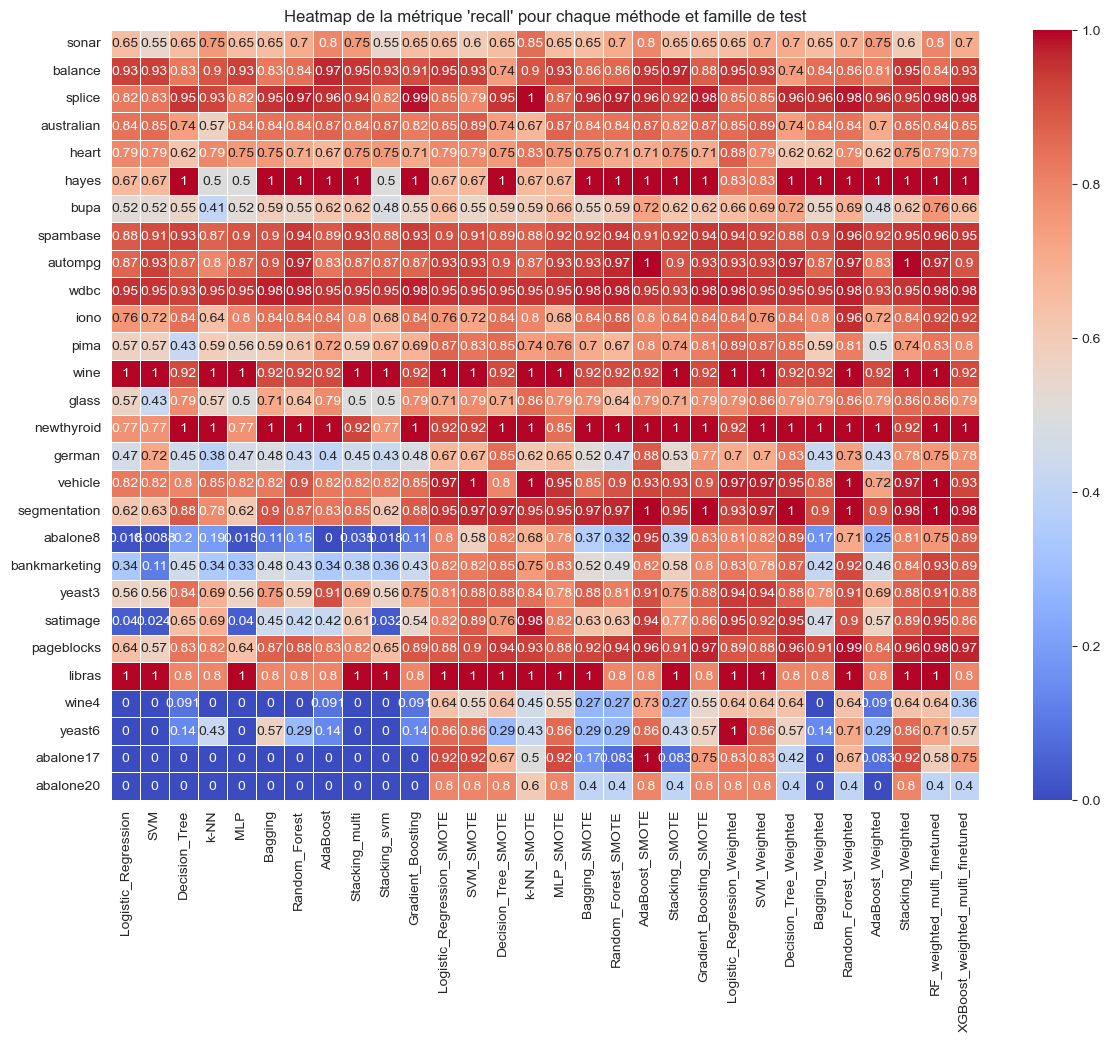

,Logistic_Regression,SVM,Decision_Tree,k-NN,MLP,Bagging,Random_Forest,AdaBoost,Stacking_multi,Stacking_svm,Gradient_Boosting,Logistic_Regression_SMOTE,SVM_SMOTE,Decision_Tree_SMOTE,k-NN_SMOTE,MLP_SMOTE,Bagging_SMOTE,Random_Forest_SMOTE,AdaBoost_SMOTE,Stacking_SMOTE,Gradient_Boosting_SMOTE,Logistic_Regression_Weighted,SVM_Weighted,Decision_Tree_Weighted,Bagging_Weighted,Random_Forest_Weighted,AdaBoost_Weighted,Stacking_Weighted,RF_weighted_multi_finetuned,XGBoost_weighted_multi_finetuned
sonar,0.650000,0.550000,0.650000,0.750000,0.650000,0.650000,0.700000,0.800000,0.750000,0.550000,0.650000,0.650000,0.600000,0.650000,0.850000,0.650000,0.650000,0.700000,0.800000,0.650000,0.650000,0.650000,0.700000,0.700000,0.650000,0.700000,0.750000,0.600000,0.800000,0.700000
balance,0.931034,0.931034,0.827586,0.896552,0.931034,0.827586,0.844828,0.965517,0.948276,0.931034,0.913793,0.948276,0.931034,0.741379,0.896552,0.931034,0.862069,0.862069,0.948276,0.965517,0.879310,0.948276,0.931034,0.741379,0.844828,0.862069,0.810345,0.948276,0.844828,0.931034
splice,0.821561,0.832714,0.947955,0.925651,0.821561,0.951673,0.973978,0.959108,0.940520,0.821561,0.985130,0.851301,0.791822,0.947955,0.996283,0.866171,0.955390,0.973978,0.962825,0.918216,0.977695,0.851301,0.851301,0.962825,0.955390,0.981413,0.955390,0.947955,0.981413,0.981413
australian,0.836066,0.852459,0.737705,0.573770,0.836066,0.836066,0.836066,0.868852,0.836066,0.868852,0.819672,0.852459,0.885246,0.737705,0.672131,0.868852,0.836066,0.836066,0.868852,0.819672,0.868852,0.852459,0.885246,0.737705,0.836066,0.836066,0.704918,0.852459,0.836066,0.852459
heart,0.791667,0.791667,0.625000,0.791667,0.750000,0.750000,0.708333,0.666667,0.750000,0.750000,0.708333,0.791667,0.791667,0.750000,0.833333,0.750000,0.750000,0.708333,0.708333,0.750000,0.708333,0.875000,0.791667,0.625000,0.625000,0.791667,0.625000,0.750000,0.791667,0.791667
hayes,0.666667,0.666667,1.000000,0.500000,0.500000,1.000000,1.000000,1.000000,1.000000,0.500000,1.000000,0.666667,0.666667,1.000000,0.666667,0.666667,1.000000,1.000000,1.000000,1.000000,1.000000,0.833333,0.833333,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
bupa,0.517241,0.517241,0.551724,0.413793,0.517241,0.586207,0.551724,0.620690,0.620690,0.482759,0.551724,0.655172,0.551724,0.586207,0.586207,0.655172,0.551724,0.586207,0.724138,0.620690,0.620690,0.655172,0.689655,0.724138,0.551724,0.689655,0.482759,0.620690,0.758621,0.655172
spambase,0.883929,0.910714,0.928571,0.872024,0.895833,0.898810,0.943452,0.886905,0.934524,0.877976,0.934524,0.904762,0.907738,0.892857,0.875000,0.916667,0.919643,0.943452,0.907738,0.922619,0.943452,0.937500,0.919643,0.883929,0.904762,0.961310,0.919643,0.946429,0.961310,0.946429
autompg,0.866667,0.933333,0.866667,0.800000,0.866667,0.900000,0.966667,0.833333,0.866667,0.866667,0.866667,0.933333,0.933333,0.900000,0.866667,0.933333,0.933333,0.966667,1.000000,0.900000,0.933333,0.933333,0.933333,0.966667,0.866667,0.966667,0.833333,1.000000,0.966667,0.900000
wdbc,0.952381,0.952381,0.928571,0.952381,0.952381,0.976190,0.976190,0.952381,0.952381,0.952381,0.976190,0.952381,0.952381,0.952381,0.952381,0.952381,0.976190,0.976190,0.952381,0.928571,0.976190,0.976190,0.952381,0.952381,0.952381,0.976190,0.928571,0.952381,0.976190,0.976190


In [54]:

# Visualition de cette métriqe en heat map
visualize_metric_heatmap(metrics_dict['recall'], 'recall')
display(metrics_dict['recall'])

**Moyenne performance par méthode**

In [55]:
# obtenir la moyenne de performance de chaque méthode sur l'ensemble du dataset : # Liste des métriques à inclure dans le tableau final
selected_metrics = ['accuracy', 'precision', 'recall', 'f1_score', 'auc_roc', 'auc_pr', 'training_time']

# Dictionnaire pour stocker les moyennes de chaque méthode
summary_data = {}

# Parcourir chaque métrique dans la liste sélectionnée
for metric in selected_metrics:
    if metric in metrics_dict:  # Vérifier si la métrique existe dans le dictionnaire
        metric_df = metrics_dict[metric]  # Récupérer le DataFrame correspondant à la métrique
        summary_data[metric] = metric_df.mean(axis=0)  # Calculer la moyenne par colonne (chaque méthode)
    else:
        print(f"Attention: La métrique {metric} n'est pas disponible dans le dictionnaire.")

# Créer un DataFrame avec les moyennes calculées pour chaque métrique
summary_table = pd.DataFrame(summary_data)
# Trier le tableau par ordre décroissant de F1-score, ensuite recall, ensuite AUC-PR
mean_perf_per_method_sorted = summary_table.sort_values(
    by=['f1_score', 'recall', 'auc_pr'],  # Colonnes à utiliser pour le tri
    ascending=False  # Tri décroissant
)
# Afficher le tableau récapitulatif
print(mean_perf_per_method_sorted)





                 accuracy  precision   recall   f1_score   auc_roc   auc_pr   training_time
Bagging_SMOTE    0.902461  0.712400   0.730658  0.714346  0.898613  0.733351    11.080532  
Stacking_SMOTE   0.897605  0.699270   0.741267  0.713056  0.909534  0.741371     5.669102  
Random_Fores...  0.901836  0.720510   0.715625  0.711027  0.915047  0.760684     1.164678  
Gradient_Boo...  0.870541  0.669978   0.834988  0.703735  0.902723  0.736917     5.642079  
RF_weighted_...  0.869344  0.635234   0.861845  0.698980  0.914696  0.770042    57.845147  
Bagging          0.908204  0.742837   0.667037  0.697453  0.889295  0.751663     4.692443  
XGBoost_weig...  0.865929  0.646359   0.828822  0.695847  0.906995  0.743723    21.773391  
Random_Forest    0.914418  0.763278   0.652635  0.692095  0.895666  0.761383     0.816517  
Gradient_Boo...  0.907725  0.774261   0.664689  0.689820  0.908736  0.760447     3.277946  
Random_Fores...  0.862453  0.627007   0.856235  0.687864  0.904394  0.763200    

**Moyenne performance par méthode sur le Groupe 1 (dit équilibré)**

In [56]:
# Obtenir la moyenne de perf, sur le groupe 1 
# Liste des métriques à inclure dans le tableau final
selected_metrics = ['accuracy', 'precision', 'recall', 'f1_score', 'auc_roc', 'auc_pr', 'training_time']

# Dictionnaire pour stocker les moyennes de chaque méthode
summary_data = {}

# Parcourir chaque métrique dans la liste sélectionnée
for metric in selected_metrics:
    if metric in metrics_dict:  # Vérifier si la métrique existe dans le dictionnaire
        metric_df = metrics_dict[metric]  # Récupérer le DataFrame correspondant à la métrique
        
        # Calculer la moyenne seulement sur les 7 premiers datasets
        summary_data[metric] = metric_df.head(7).mean(axis=0)
    else:
        print(f"Attention: La métrique {metric} n'est pas disponible dans le dictionnaire.")

# Créer un DataFrame avec les moyennes calculées pour chaque métrique
mean_perf_balanced = pd.DataFrame(summary_data)

# Afficher le tableau récapitulatif
print(mean_perf_balanced)


                 accuracy  precision   recall   f1_score   auc_roc   auc_pr   training_time
Logistic_Reg...  0.809261  0.821342   0.744891  0.774950  0.871582  0.864344     1.185048  
SVM              0.799559  0.816319   0.734540  0.765611  0.860600  0.852454     0.360432  
Decision_Tree    0.807431  0.799375   0.762853  0.779337  0.809084  0.758906     0.348905  
k-NN             0.787871  0.830466   0.693062  0.734889  0.872330  0.821602     0.320185  
MLP              0.815505  0.849743   0.715129  0.768162  0.872575  0.864997     0.357324  
Bagging          0.848193  0.847585   0.800219  0.822085  0.896337  0.896331     2.328988  
Random_Forest    0.858088  0.865711   0.802133  0.829936  0.916594  0.911913     0.767625  
AdaBoost         0.860452  0.844087   0.840119  0.839600  0.892893  0.875080     3.216490  
Stacking_multi   0.883800  0.895553   0.835079  0.862321  0.915827  0.900690     1.036150  
Stacking_svm     0.791778  0.794234   0.700601  0.740322  0.862682  0.856358    

**Moyenne performance Group 2 ( données déséquilibrées)**

In [57]:
# Moyenne de performance Groupe 2
selected_metrics = ['accuracy', 'precision', 'recall', 'f1_score', 'auc_roc', 'auc_pr', 'training_time']

# Dictionnaire pour stocker les moyennes de chaque méthode
summary_data = {}

# Parcourir chaque métrique dans la liste sélectionnée
for metric in selected_metrics:
    if metric in metrics_dict:  # Vérifier si la métrique existe dans le dictionnaire
        metric_df = metrics_dict[metric]  # Récupérer le DataFrame correspondant à la métrique
        
        # Calculer la moyenne pour les datasets après les 7 premiers (de la 8e ligne jusqu'à la fin)
        summary_data[metric] = metric_df.iloc[7:].mean(axis=0)
    else:
        print(f"Attention: La métrique {metric} n'est pas disponible dans le dictionnaire.")

# Créer un DataFrame avec les moyennes calculées pour chaque métrique
mean_perf_unbalanced = pd.DataFrame(summary_data)
# Trier le tableau par ordre décroissant de F1-score, ensuite recall, ensuite AUC-PR

# Afficher le tableau récapitulatif
print(mean_perf_unbalanced)


                 accuracy  precision   recall   f1_score   auc_roc   auc_pr   training_time
Logistic_Reg...  0.901032  0.648137   0.518300  0.537649  0.862119  0.629302     0.393795  
SVM              0.902711  0.633040   0.511478  0.527078  0.854450  0.615554     0.482119  
Decision_Tree    0.899927  0.629932   0.611313  0.602275  0.811895  0.554907     0.413924  
k-NN             0.903900  0.661368   0.590423  0.615682  0.833738  0.623116     0.490676  
MLP              0.909859  0.663620   0.516038  0.545135  0.896987  0.650546     0.480952  
Bagging          0.928207  0.707921   0.622643  0.655909  0.886948  0.703440     5.480261  
Random_Forest    0.933195  0.729134   0.602803  0.646148  0.888691  0.711206     0.832815  
AdaBoost         0.912679  0.667732   0.597030  0.604285  0.862882  0.633041     5.191047  
Stacking_multi   0.917659  0.649589   0.581695  0.601873  0.923761  0.712408     3.657796  
Stacking_svm     0.906287  0.647407   0.514609  0.543949  0.902743  0.644350    

**Barplot du (F1_score, Recall, AUC_PR) moyens par méthode G1 vs G2**

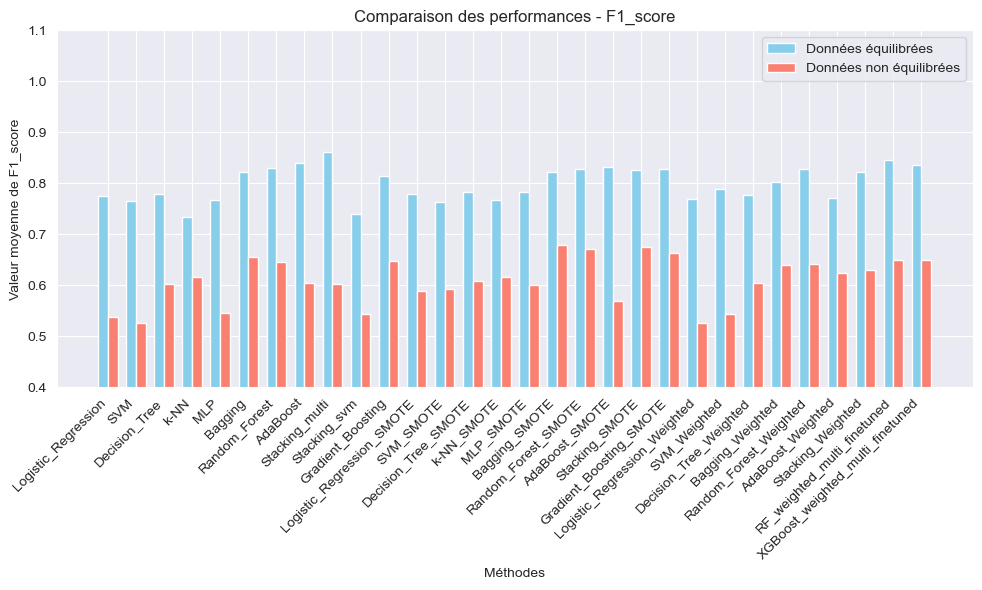

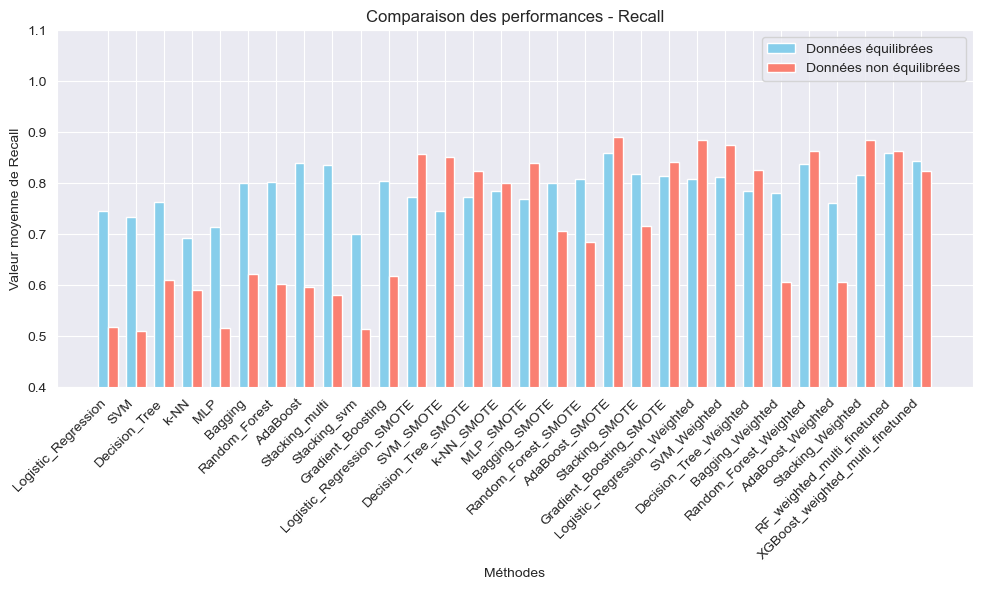

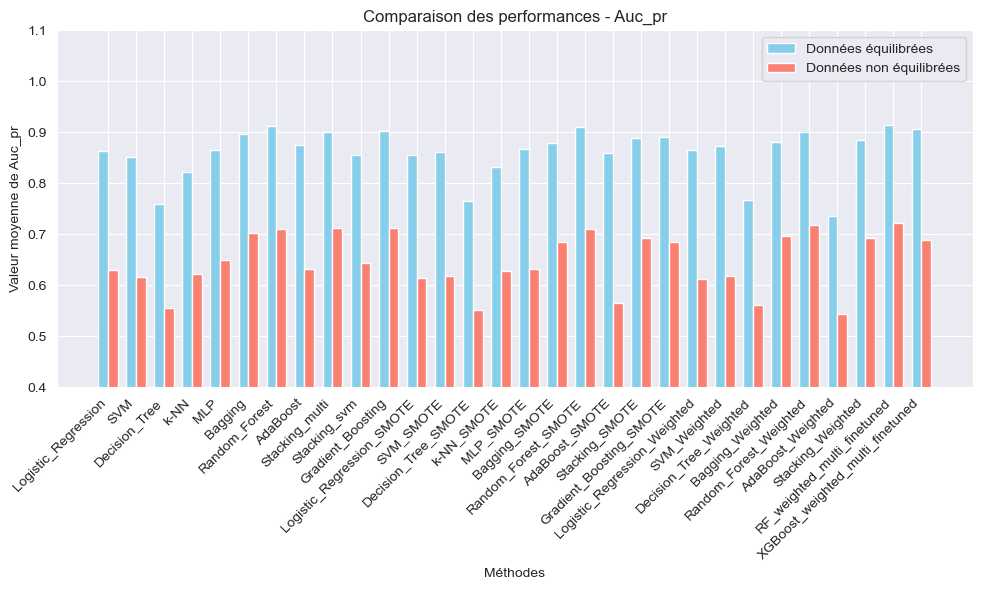

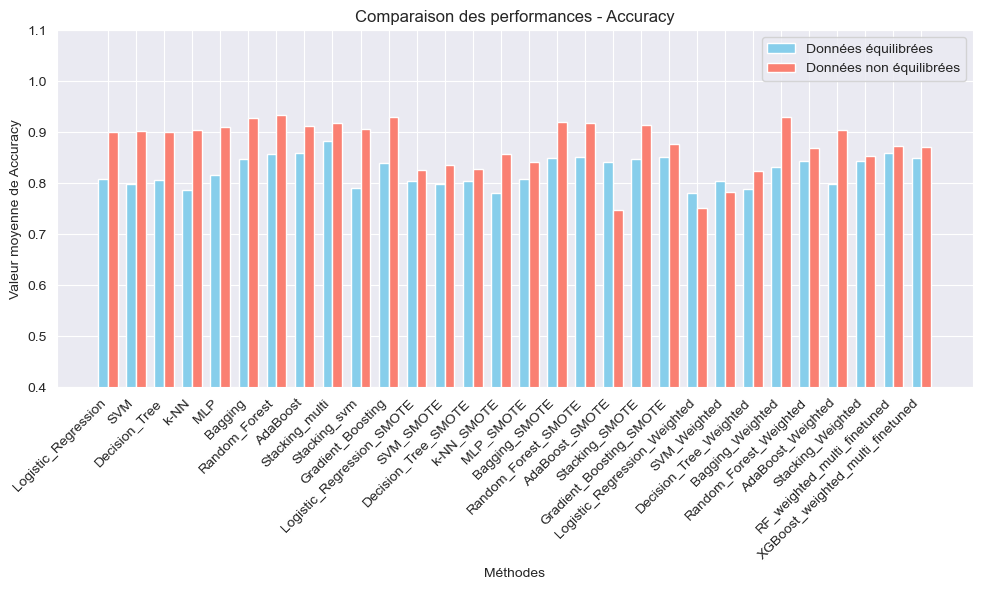

In [58]:

# Définir les métriques à tracer
metrics_to_plot = ['f1_score', 'recall', 'auc_pr', 'accuracy']

# Obtenir les noms des méthodes à partir de l'un des DataFrames
methods = mean_perf_balanced.index  # Les méthodes doivent être dans l'index

# Création d'un graphique par métrique
for metric in metrics_to_plot:
    # Extraire les valeurs spécifiques pour la métrique pour chaque méthode
    balanced_values = mean_perf_balanced[metric]
    unbalanced_values = mean_perf_unbalanced[metric]

    # Indices pour chaque méthode
    x = np.arange(len(methods))

    # Largeur des barres
    width = 0.35

    # Création du barplot
    fig, ax = plt.subplots(figsize=(10, 6))

    # Barres pour les performances sur données équilibrées
    bars_balanced = ax.bar(x - width/2, balanced_values, width, label='Données équilibrées', color='skyblue')

    # Barres pour les performances sur données non équilibrées
    bars_unbalanced = ax.bar(x + width/2, unbalanced_values, width, label='Données non équilibrées', color='salmon')

    # Ajouter des labels, un titre et une légende
    ax.set_xlabel('Méthodes')
    ax.set_ylabel(f'Valeur moyenne de {metric.capitalize()}')
    ax.set_title(f'Comparaison des performances - {metric.capitalize()}')
    ax.set_xticks(x)
    ax.set_xticklabels(methods, rotation=45, ha="right")
    ax.set_ylim(0.4, 1.1)
    ax.legend()

    # Afficher le graphique
    plt.tight_layout()
    plt.show()


**Barplot du (F1_score, Recall, AUC_PR) moyens par méthode G1 vs G2, classés par perf sur G2**

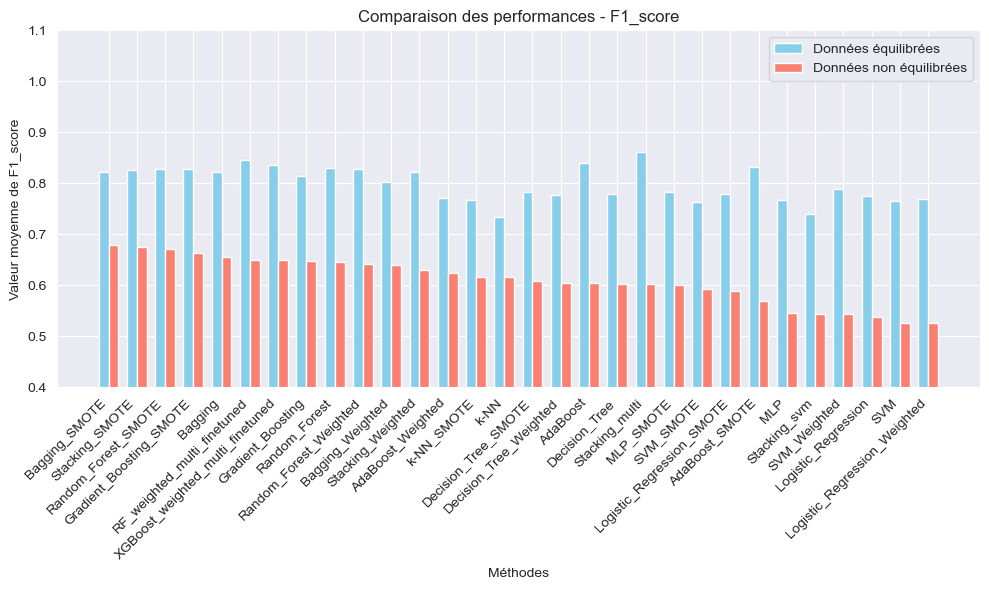

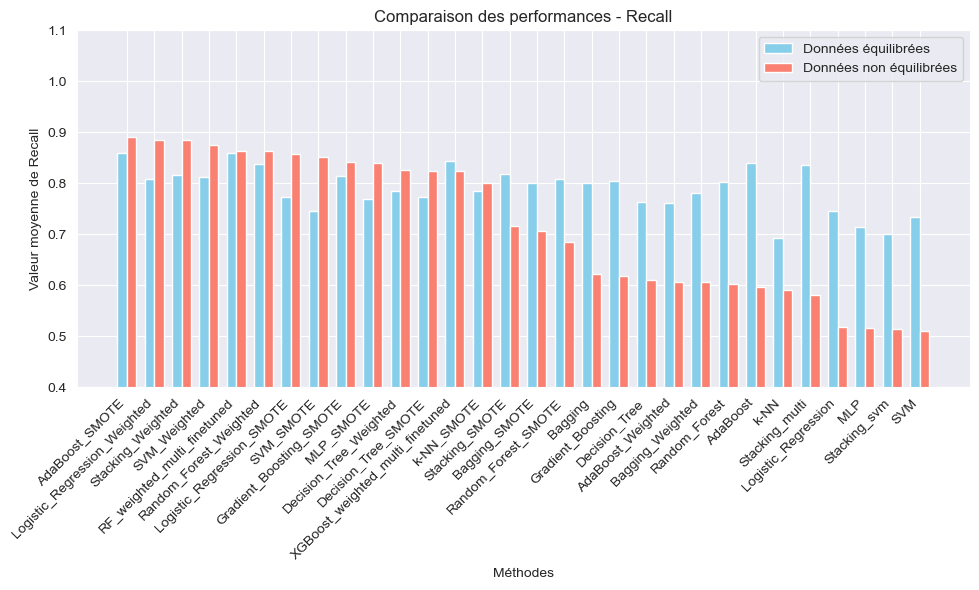

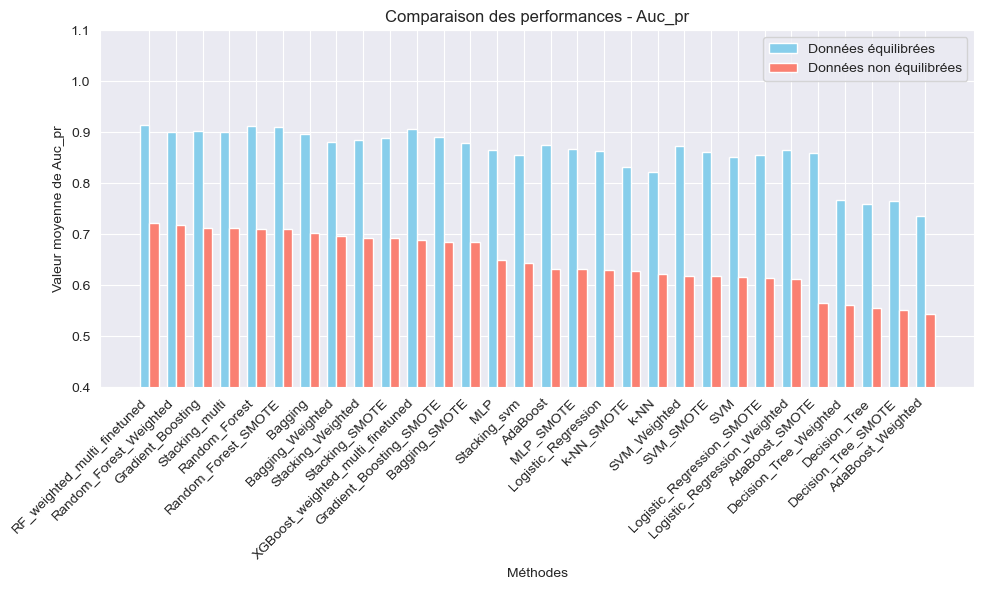

In [65]:
import matplotlib.pyplot as plt
import numpy as np

# Définir les métriques à tracer
metrics_to_plot = ['f1_score', 'recall', 'auc_pr']

# Obtenir les noms des méthodes à partir de l'un des DataFrames
methods = mean_perf_balanced.index  # Les méthodes doivent être dans l'index

# Création d'un graphique par métrique
for metric in metrics_to_plot:
    # Extraire les valeurs spécifiques pour la métrique pour chaque méthode
    balanced_values = mean_perf_balanced[metric]
    unbalanced_values = mean_perf_unbalanced[metric]

    # Trier les méthodes par performance sur les données non équilibrées
    sorted_indices = np.argsort(unbalanced_values)[::-1]  # Indices triés par ordre décroissant

    # Appliquer le tri aux valeurs et aux méthodes
    balanced_values_sorted = balanced_values[sorted_indices]
    unbalanced_values_sorted = unbalanced_values[sorted_indices]
    methods_sorted = methods[sorted_indices]

    # Indices pour chaque méthode triée
    x = np.arange(len(methods_sorted))

    # Largeur des barres
    width = 0.35

    # Création du barplot
    fig, ax = plt.subplots(figsize=(10, 6))

    # Barres pour les performances sur données équilibrées (triées)
    bars_balanced = ax.bar(x - width/2, balanced_values_sorted, width, label='Données équilibrées', color='skyblue')

    # Barres pour les performances sur données non équilibrées (triées)
    bars_unbalanced = ax.bar(x + width/2, unbalanced_values_sorted, width, label='Données non équilibrées', color='salmon')

    # Ajouter des labels, un titre et une légende
    ax.set_xlabel('Méthodes')
    ax.set_ylabel(f'Valeur moyenne de {metric.capitalize()}')
    ax.set_title(f'Comparaison des performances - {metric.capitalize()}')
    ax.set_xticks(x)
    ax.set_xticklabels(methods_sorted, rotation=45, ha="right")
    ax.legend()

    # Limiter l'échelle de l'axe y pour accentuer les différences
    ax.set_ylim(0.4, 1.1)

    # Afficher le graphique
    plt.tight_layout()
    plt.show()


**Influence des techniques de rééquilibrage : performance moyenne sur les données déséquilibrés des algos regroupés**

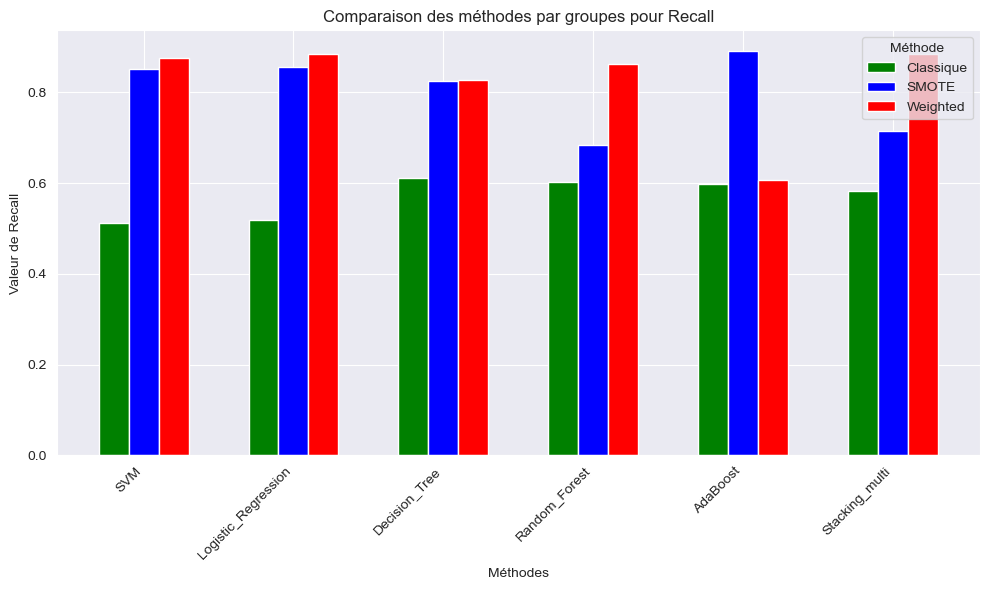

In [60]:
# Méthodes à regrouper par famille (par exemple, SVM, Logistic Regression, etc.)
grouped_methods = [
    ('SVM', 'SVM_SMOTE', 'SVM_Weighted'),
    ('Logistic_Regression', 'Logistic_Regression_SMOTE', 'Logistic_Regression_Weighted'),
    ('Decision_Tree', 'Decision_Tree_SMOTE', 'Decision_Tree_Weighted'),
    ('Random_Forest', 'Random_Forest_SMOTE', 'Random_Forest_Weighted'),
    ('AdaBoost', 'AdaBoost_SMOTE', 'AdaBoost_Weighted'),
    ('Stacking_multi', 'Stacking_SMOTE', 'Stacking_Weighted')
]

# Métrique à tracer
metric = 'recall'

# Créer le graphique
fig, ax = plt.subplots(figsize=(10, 6))

# Définir l'espacement entre les groupes
x = np.arange(len(grouped_methods))

# Largeur des barres
bar_width = 0.2

# Couleurs pour chaque type de méthode
colors = {'Classique': 'green', 'SMOTE': 'blue', 'Weighted': 'red'}

# Parcourir chaque groupe de méthodes et créer les barres
for i, (method1, method2, method3) in enumerate(grouped_methods):
    # Extraire les valeurs des performances pour les trois méthodes du groupe
    val1 = mean_perf_unbalanced.loc[method1, metric]
    val2 = mean_perf_unbalanced.loc[method2, metric]
    val3 = mean_perf_unbalanced.loc[method3, metric]
    
    # Ajouter les barres pour chaque méthode dans le groupe avec code couleur
    ax.bar(x[i] - bar_width, val1, bar_width, color=colors['Classique'], label='Classique' if i == 0 else "")
    ax.bar(x[i], val2, bar_width, color=colors['SMOTE'], label='SMOTE' if i == 0 else "")
    ax.bar(x[i] + bar_width, val3, bar_width, color=colors['Weighted'], label='Weighted' if i == 0 else "")

# Ajouter les labels et les ticks
ax.set_xlabel('Méthodes')
ax.set_ylabel(f'Valeur de {metric.capitalize()}')
ax.set_title(f'Comparaison des méthodes par groupes pour {metric.capitalize()}')

# Ajouter uniquement les noms des méthodes classiques sur l'axe x
ax.set_xticks(x)
ax.set_xticklabels([f'{grp[0]}' for grp in grouped_methods], rotation=45, ha="right")

# Ajouter la légende explicative pour les couleurs
ax.legend(title="Méthode")

# Afficher le graphique
plt.tight_layout()
plt.show()


**Cas des datasets très déséquilibrés (<10%)**

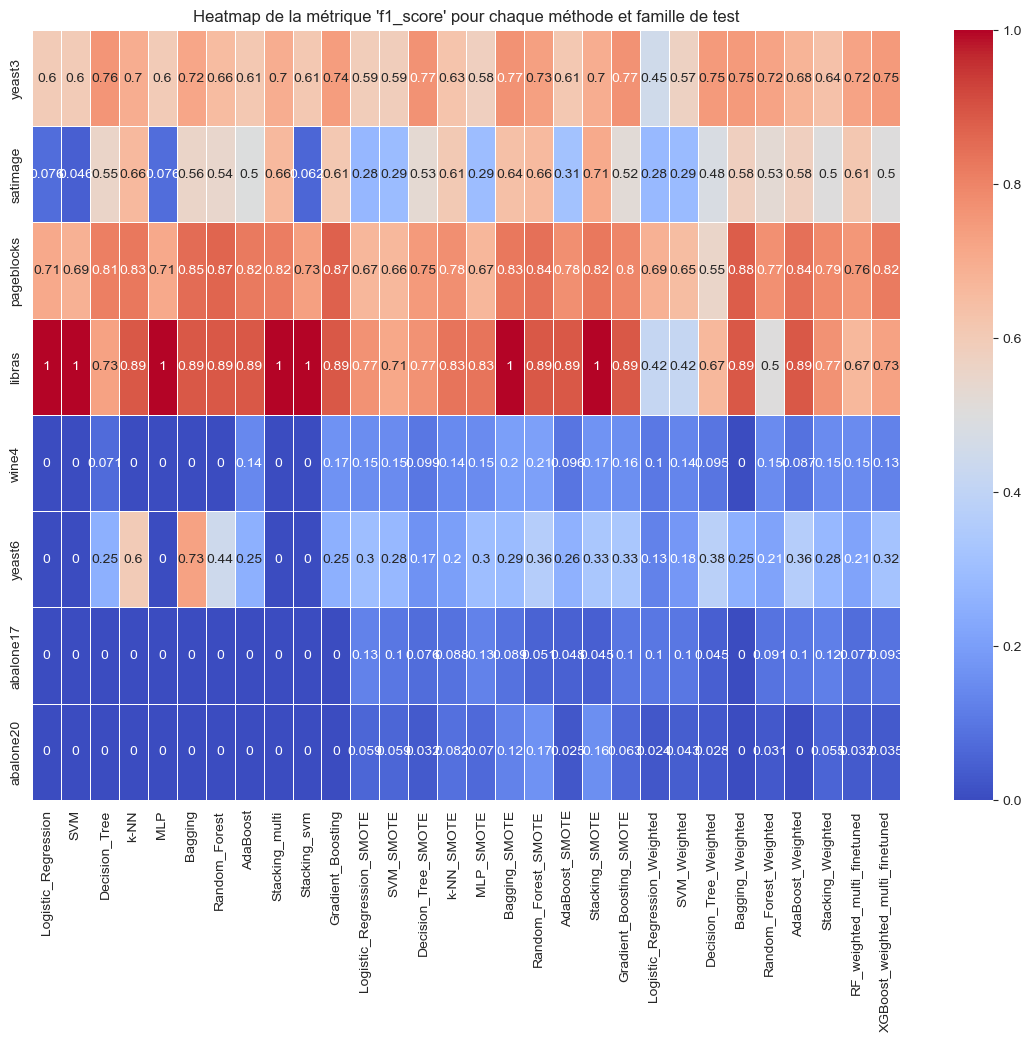

In [61]:
# Récupérons les résultats des datasets très déséquilibrés :
# Visualition de cette métriqe en heat map pour les datasets à moins de 10% de classe positive
visualize_metric_heatmap(metrics_dict['f1_score'].iloc[20:,:], 'f1_score')

**Coût en temps d'entrainement**

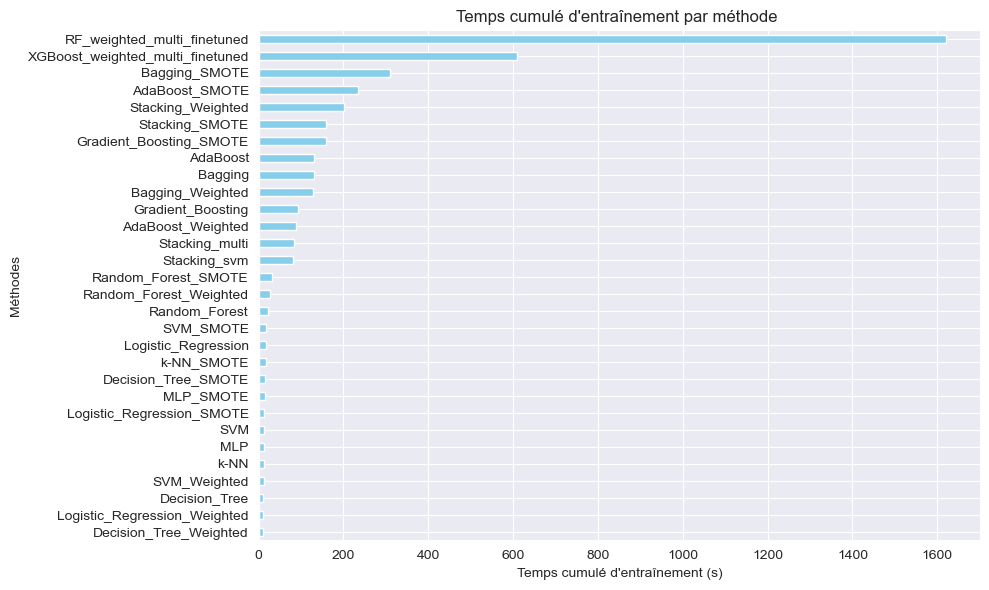

In [62]:
# Extraire le DataFrame pour 'training_time' du dictionnaire
training_time_df = metrics_dict['training_time']

# Calculer la moyenne du temps d'entraînement pour chaque méthode
mean_training_time = training_time_df.sum(axis=0)

# Trier les résultats par ordre croissant
mean_training_time_sorted = mean_training_time.sort_values()

# Plotter la moyenne du temps d'entraînement par méthode en ordre croissant
plt.figure(figsize=(10, 6))
mean_training_time_sorted.plot(kind='barh', color='skyblue')
plt.xlabel('Temps cumulé d\'entraînement (s)')
plt.ylabel('Méthodes')
plt.title('Temps cumulé d\'entraînement par méthode ')
plt.tight_layout()
plt.show()


**résultats des modèles avec pondération et multifinetunés **

In [63]:

f1_scores_df = metrics_dict['f1_score']

# Identifier les datasets où 'XGBoost_Weighted_multi_finetuned' est première
# Comparer chaque score de cette méthode avec le maximum des scores pour chaque dataset
best_datasets = f1_scores_df.index[f1_scores_df.idxmax(axis=1) == 'XGBoost_Weighted_multi_finetuned'].tolist()

# Afficher les datasets où 'XGBoost_Weighted_multi_finetuned' a été première
print(f"'XGBoost_Weighted_multi_finetuned' a été première sur les datasets suivants : {best_datasets}")


'XGBoost_Weighted_multi_finetuned' a été première sur les datasets suivants : []


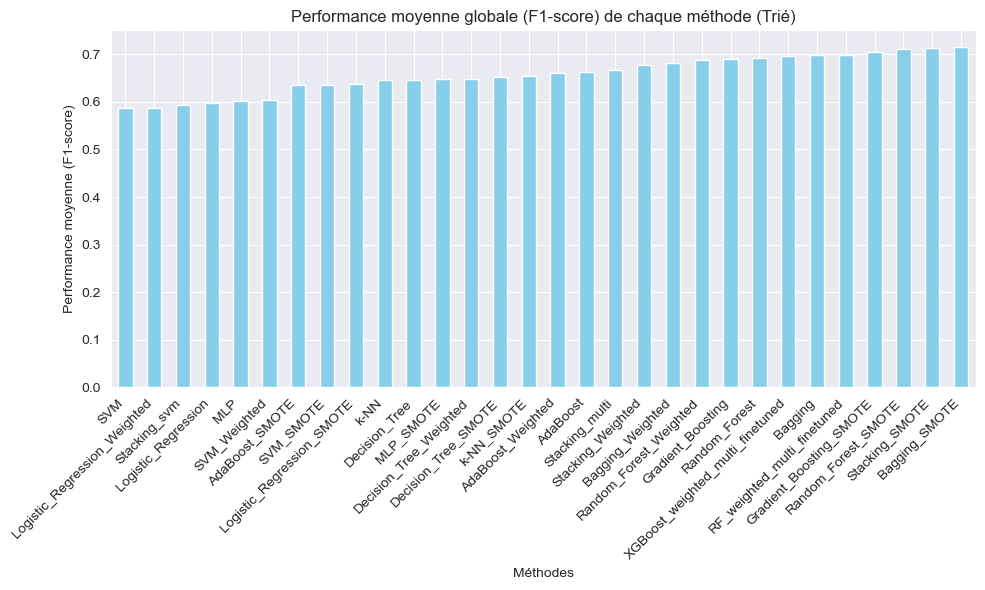

In [64]:
import matplotlib.pyplot as plt

# Calculer la moyenne pour chaque méthode sur tous les datasets pour une métrique donnée (f1_score par exemple)
mean_perf_global = metrics_dict['f1_score'].mean(axis=0)

# Trier les performances moyennes par ordre croissant
mean_perf_global_sorted = mean_perf_global.sort_values(ascending=True)

# Créer un barplot des performances moyennes triées
plt.figure(figsize=(10, 6))
mean_perf_global_sorted.plot(kind='bar', color='skyblue')
plt.title("Performance moyenne globale (F1-score) de chaque méthode (Trié)")
plt.xlabel("Méthodes")
plt.ylabel("Performance moyenne (F1-score)")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Afficher le graphique
plt.show()
